<a href="https://colab.research.google.com/github/domanmat/Clustering_Speeddating/blob/main/Clustering_Meeter_UMBD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ładownie danych

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive #pakiet do dysku google
drive.mount('/content/drive')
file_path = r"/content/drive/MyDrive/Colab Notebooks/dating/Speed_Dating_Data.csv"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv(file_path, encoding='ISO-8859-1')

In [ ]:
pd.set_option('display.max_columns', None)
data.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9

In [ ]:
data_interests = data.loc[:, ['iid', 'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga']].copy()

data_interests.rename(columns={'iid': 'id'}, inplace=True)
data_interests.drop_duplicates(inplace=True)
data_interests.set_index('id', inplace=True)

data_interests

,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga
id,,,,,,,,,,,,,,,,,
1,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0
2,3.0,2.0,7.0,10.0,8.0,6.0,3.0,5.0,8.0,10.0,1.0,9.0,8.0,7.0,8.0,3.0,1.0
3,3.0,8.0,7.0,8.0,5.0,5.0,8.0,4.0,5.0,7.0,8.0,7.0,7.0,7.0,5.0,8.0,7.0
4,1.0,1.0,6.0,7.0,6.0,7.0,7.0,5.0,7.0,7.0,7.0,9.0,7.0,8.0,7.0,1.0,8.0
5,7.0,4.0,7.0,7.0,6.0,8.0,6.0,6.0,8.0,6.0,8.0,6.0,6.0,3.0,7.0,8.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548,10.0,8.0,4.0,10.0,3.0,2.0,2.0,5.0,1.0,9.0,6.0,4.0,6.0,7.0,10.0,4.0,1.0
549,8.0,5.0,6.0,9.0,7.0,7.0,4.0,8.0,8.0,7.0,7.0,8.0,8.0,10.0,10.0,8.0,2.0
550,5.0,3.0,5.0,9.0,7.0,8.0,3.0,3.0,8.0,8.0,3.0,7.0,7.0,4.0,6.0,6.0,3.0


## Przygotowanie danych

Porównujemy wartości 6 atrybutów: atrakcyjności, szczerości, inteligencji, zabawność, ambicji i tego jak wspólne mają zainteresowania - tych oczekiwanych ze średnią ocen otrzymanych przez partnerów.

### Poprawność danych

Czy są jakieś wartości spoza zakresu?

In [ ]:
def check_attr(name):
  return (data[name] > 10) & (data[name] < 0)

In [ ]:
data.loc[check_attr('attr') | check_attr('sinc') | check_attr('intel') | check_attr('fun') | check_attr('amb') | check_attr('amb')]

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3


In [ ]:
data.loc[check_attr('attr1_1') | check_attr('sinc1_1') | check_attr('intel1_1') | check_attr('fun1_1') | check_attr('amb1_1') | check_attr('shar1_1')]

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3


## Filtrowanie przed klastrowaniem (kobiety, mężczyźni, itp.)

In [ ]:
# # filtrowanie 0 - kobiety, 1 - mężczyźni
# data = data[data['gender'] == 1]
# # filtrowanie age
# data = data[data['age'] < 27]
# data.loc[:,['gender']]
data

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9

### Wartości pożądane przez osoby

In [ ]:
# wyciągamy odpowienie kolumny
data_subset_desired = data.loc[:, ['iid', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']].copy()
# data_subset_desired

# usuwamy duplikaty
data_subset_desired.drop_duplicates(inplace=True)
# data_subset_desired

# dla spójności zmieniamy nazwy kolumn
data_subset_desired.rename(columns={ 'iid': 'id' }, inplace=True)
data_subset_desired.set_index('id', inplace=True)
data_subset_desired

,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1
id,,,,,,
1,15.0,20.0,20.0,15.0,15.0,15.0
2,45.0,5.0,25.0,20.0,0.0,5.0
3,35.0,10.0,35.0,10.0,10.0,0.0
4,20.0,20.0,20.0,20.0,10.0,10.0
5,20.0,5.0,25.0,25.0,10.0,15.0
...,...,...,...,...,...,...
548,40.0,10.0,20.0,10.0,0.0,20.0
549,20.0,20.0,20.0,20.0,0.0,20.0
550,30.0,3.0,30.0,30.0,3.0,4.0


### Wartości otrzymane od partnerów

In [ ]:
# wyciągamy odpowiednie kolumny
data_subset_received_overall = data.loc[:, ['pid', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar']].copy()
# data_subset_received_overall

# grupujemy dane po id partnera
data_subset_received = data_subset_received_overall.groupby(['pid']).mean()
# data_subset_received

# zmieniamy nazwę indeksu dla spójności
data_subset_received.index.names = ['id']
data_subset_received

,attr,sinc,intel,fun,amb,shar
id,,,,,,
1.0,6.700000,7.400000,8.000000,7.200000,8.000000,7.100000
2.0,7.700000,7.100000,7.900000,7.500000,7.500000,6.500000
3.0,6.500000,7.100000,7.300000,6.200000,7.111111,6.000000
4.0,7.000000,7.100000,7.700000,7.500000,7.700000,7.200000
5.0,5.300000,7.700000,7.600000,7.200000,7.800000,6.200000
...,...,...,...,...,...,...
548.0,6.857143,5.809524,6.666667,5.714286,6.150000,4.450000
549.0,6.350000,6.650000,6.850000,6.650000,6.000000,5.111111
550.0,5.136364,5.818182,6.500000,5.272727,6.363636,4.190476


In [ ]:
# wyciągamy odpowiednie kolumny
data_subset_id = data.loc[:, ['iid', 'age', 'gender']].copy()

# grupujemy dane po id partnera
# data_subset_id = data_subset_id.groupby(['iid']).mean()
# data_subset_received

# zmieniamy nazwę indeksu dla spójności
data_subset_id.drop_duplicates(inplace=True)
# data_subset_id.reset_index(drop=True, inplace=True)
data_subset_id.dropna(inplace=True)
data_subset_id.rename(columns={ 'iid': 'id' }, inplace=True)

# Set 'id' column as index
data_subset_id.set_index('id', inplace=True)

data_subset_id

,age,gender
id,,
1,21.0,0
2,24.0,0
3,25.0,0
4,23.0,0
5,21.0,0
...,...,...
548,30.0,1
549,28.0,1
550,30.0,1


In [ ]:
# POWINNO BYĆ TO SAMO CO WYŻEJ - ale tylko gdy nie filtrujemy płci
# wyciągamy odpowiednie kolumny
data_subset_received_overall = data.loc[:, ['iid', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o']].copy()
# data_subset_received_overall

# grupujemy dane po id partnera
data_subset_received = data_subset_received_overall.groupby(['iid']).mean()
data_subset_received.rename(columns={
    'attr_o': 'attr',
    'sinc_o': 'sinc',
    'intel_o': 'intel',
    'fun_o': 'fun',
    'amb_o': 'amb',
    'shar_o': 'shar'
}, inplace=True)
# zmieniamy nazwę indeksu dla spójności
data_subset_received.index.names = ['id']
data_subset_received

,attr,sinc,intel,fun,amb,shar
id,,,,,,
1,6.700000,7.400000,8.000000,7.200000,8.000000,7.100000
2,7.700000,7.100000,7.900000,7.500000,7.500000,6.500000
3,6.500000,7.100000,7.300000,6.200000,7.111111,6.000000
4,7.000000,7.100000,7.700000,7.500000,7.700000,7.200000
5,5.300000,7.700000,7.600000,7.200000,7.800000,6.200000
...,...,...,...,...,...,...
548,6.857143,5.809524,6.666667,5.714286,6.150000,4.450000
549,6.350000,6.650000,6.850000,6.650000,6.000000,5.111111
550,5.136364,5.818182,6.500000,5.272727,6.363636,4.190476


### Test zgodności importu / obliczeń (a raczej importu danych)

In [ ]:
# data13 = data.loc[data['pid'] == 13, ['attr', 'sinc', 'intel', 'fun', 'amb', 'shar']]
# data13.mean(axis=0)

In [ ]:
# # powinno być to samo co wyżej
# data_subset_received.loc[13]

### Czyszczenie danych

In [ ]:
# łączę, żeby podczas usuwania nanów, usunąć te same wiersze
data_subset_temp1 = pd.concat([data_subset_desired, data_subset_received, data_subset_id], axis=1)
data_subset_temp1

,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr,sinc,intel,fun,amb,shar,age,gender
id,,,,,,,,,,,,,,
1,15.0,20.0,20.0,15.0,15.0,15.0,6.700000,7.400000,8.000000,7.200000,8.000000,7.100000,21.0,0.0
2,45.0,5.0,25.0,20.0,0.0,5.0,7.700000,7.100000,7.900000,7.500000,7.500000,6.500000,24.0,0.0
3,35.0,10.0,35.0,10.0,10.0,0.0,6.500000,7.100000,7.300000,6.200000,7.111111,6.000000,25.0,0.0
4,20.0,20.0,20.0,20.0,10.0,10.0,7.000000,7.100000,7.700000,7.500000,7.700000,7.200000,23.0,0.0
5,20.0,5.0,25.0,25.0,10.0,15.0,5.300000,7.700000,7.600000,7.200000,7.800000,6.200000,21.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548,40.0,10.0,20.0,10.0,0.0,20.0,6.857143,5.809524,6.666667,5.714286,6.150000,4.450000,30.0,1.0
549,20.0,20.0,20.0,20.0,0.0,20.0,6.350000,6.650000,6.850000,6.650000,6.000000,5.111111,28.0,1.0
550,30.0,3.0,30.0,30.0,3.0,4.0,5.136364,5.818182,6.500000,5.272727,6.363636,4.190476,30.0,1.0


## Data subset temp - all

In [ ]:
# usuwamy nany
data_subset_temp=data_subset_temp1.dropna()
data_subset_temp

,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr,sinc,intel,fun,amb,shar,age,gender
id,,,,,,,,,,,,,,
1,15.0,20.0,20.0,15.0,15.0,15.0,6.700000,7.400000,8.000000,7.200000,8.000000,7.100000,21.0,0.0
2,45.0,5.0,25.0,20.0,0.0,5.0,7.700000,7.100000,7.900000,7.500000,7.500000,6.500000,24.0,0.0
3,35.0,10.0,35.0,10.0,10.0,0.0,6.500000,7.100000,7.300000,6.200000,7.111111,6.000000,25.0,0.0
4,20.0,20.0,20.0,20.0,10.0,10.0,7.000000,7.100000,7.700000,7.500000,7.700000,7.200000,23.0,0.0
5,20.0,5.0,25.0,25.0,10.0,15.0,5.300000,7.700000,7.600000,7.200000,7.800000,6.200000,21.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548,40.0,10.0,20.0,10.0,0.0,20.0,6.857143,5.809524,6.666667,5.714286,6.150000,4.450000,30.0,1.0
549,20.0,20.0,20.0,20.0,0.0,20.0,6.350000,6.650000,6.850000,6.650000,6.000000,5.111111,28.0,1.0
550,30.0,3.0,30.0,30.0,3.0,4.0,5.136364,5.818182,6.500000,5.272727,6.363636,4.190476,30.0,1.0


## Data subset temp - interests

In [ ]:
data_subset_interests = pd.concat([data_subset_temp, data_interests], axis=1).dropna()
data_subset_interests

,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr,sinc,intel,fun,amb,shar,age,gender,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,15.0,20.0,20.0,15.0,15.0,15.0,6.700000,7.400000,8.000000,7.200000,8.000000,7.100000,21.0,0.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0
2,45.0,5.0,25.0,20.0,0.0,5.0,7.700000,7.100000,7.900000,7.500000,7.500000,6.500000,24.0,0.0,3.0,2.0,7.0,10.0,8.0,6.0,3.0,5.0,8.0,10.0,1.0,9.0,8.0,7.0,8.0,3.0,1.0
3,35.0,10.0,35.0,10.0,10.0,0.0,6.500000,7.100000,7.300000,6.200000,7.111111,6.000000,25.0,0.0,3.0,8.0,7.0,8.0,5.0,5.0,8.0,4.0,5.0,7.0,8.0,7.0,7.0,7.0,5.0,8.0,7.0
4,20.0,20.0,20.0,20.0,10.0,10.0,7.000000,7.100000,7.700000,7.500000,7.700000,7.200000,23.0,0.0,1.0,1.0,6.0,7.0,6.0,7.0,7.0,5.0,7.0,7.0,7.0,9.0,7.0,8.0,7.0,1.0,8.0
5,20.0,5.0,25.0,25.0,10.0,15.0,5.300000,7.700000,7.600000,7.200000,7.800000,6.200000,21.0,0.0,7.0,4.0,7.0,7.0,6.0,8.0,6.0,6.0,8.0,6.0,8.0,6.0,6.0,3.0,7.0,8.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548,40.0,10.0,20.0,10.0,0.0,20.0,6.857143,5.809524,6.666667,5.714286,6.150000,4.450000,30.0,1.0,10.0,8.0,4.0,10.0,3.0,2.0,2.0,5.0,1.0,9.0,6.0,4.0,6.0,7.0,10.0,4.0,1.0
549,20.0,20.0,20.0,20.0,0.0,20.0,6.350000,6.650000,6.850000,6.650000,6.000000,5.111111,28.0,1.0,8.0,5.0,6.0,9.0,7.0,7.0,4.0,8.0,8.0,7.0,7.0,8.0,8.0,10.0,10.0,8.0,2.0
550,30.0,3.0,30.0,30.0,3.0,4.0,5.136364,5.818182,6.500000,5.272727,6.363636,4.190476,30.0,1.0,5.0,3.0,5.0,9.0,7.0,8.0,3.0,3.0,8.0,8.0,3.0,7.0,7.0,4.0,6.0,6.0,3.0


In [ ]:
# dodanie Age i Gender
# data_subset_temp = pd.concat([data_subset_temp, data_subset_temp], axis=1)
# data_subset_temp

In [ ]:
data_subset_desired = data_subset_temp.loc[:, ['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']]
data_subset_desired.rename(columns={
    'attr1_1': 'attr',
    'sinc1_1': 'sinc',
    'intel1_1': 'intel',
    'fun1_1': 'fun',
    'amb1_1': 'amb',
    'shar1_1': 'shar'
}, inplace=True)
# data_subset_desired.reset_index(drop=True, inplace=True)
# #dodane md
# data_subset_desired.index.names = ['id']
# #
data_subset_desired

,attr,sinc,intel,fun,amb,shar
id,,,,,,
1,15.0,20.0,20.0,15.0,15.0,15.0
2,45.0,5.0,25.0,20.0,0.0,5.0
3,35.0,10.0,35.0,10.0,10.0,0.0
4,20.0,20.0,20.0,20.0,10.0,10.0
5,20.0,5.0,25.0,25.0,10.0,15.0
...,...,...,...,...,...,...
548,40.0,10.0,20.0,10.0,0.0,20.0
549,20.0,20.0,20.0,20.0,0.0,20.0
550,30.0,3.0,30.0,30.0,3.0,4.0


In [ ]:
data_subset_received = data_subset_temp.loc[:, ['attr', 'sinc', 'intel', 'fun', 'amb', 'shar']]
# data_subset_received.reset_index(drop=True, inplace=True)
# #dodane md
# data_subset_received.index.names = ['id']
#
data_subset_received

,attr,sinc,intel,fun,amb,shar
id,,,,,,
1,6.700000,7.400000,8.000000,7.200000,8.000000,7.100000
2,7.700000,7.100000,7.900000,7.500000,7.500000,6.500000
3,6.500000,7.100000,7.300000,6.200000,7.111111,6.000000
4,7.000000,7.100000,7.700000,7.500000,7.700000,7.200000
5,5.300000,7.700000,7.600000,7.200000,7.800000,6.200000
...,...,...,...,...,...,...
548,6.857143,5.809524,6.666667,5.714286,6.150000,4.450000
549,6.350000,6.650000,6.850000,6.650000,6.000000,5.111111
550,5.136364,5.818182,6.500000,5.272727,6.363636,4.190476


## Skalowanie danych

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np

In [ ]:
scaler = StandardScaler()

In [ ]:
data_scaled_desired = scaler.fit_transform(data_subset_desired)
data_scaled_desired

array([[-0.59089409,  0.37345202, -0.02499443, -0.39658305,  0.6711788 ,
         0.49032973],
       [ 1.76633812, -1.70723234,  0.70268464,  0.41088419, -1.73662153,
        -1.05462863],
       [ 0.98059405, -1.01367089,  2.15804277, -1.2040503 , -0.13142131,
        -1.8271078 ],
       ...,
       [ 0.58772201, -1.98465692,  1.4303637 ,  2.02581868, -1.25506146,
        -1.20912446],
       [ 1.37346608,  0.37345202, -0.02499443,  0.41088419, -1.73662153,
        -1.8271078 ],
       [ 3.73069829, -2.4007938 , -0.75267349, -0.39658305, -1.73662153,
        -1.8271078 ]])

In [ ]:
scaler.mean_, scaler.var_

(array([22.52018519, 17.30772222, 20.17174074, 17.45572222, 10.81872222,
        11.82625926]),
 array([161.97119145,  51.97208166,  47.21285327,  38.34336115,
         38.80981559,  41.89541008]))

In [ ]:
data_scaled_desired.mean(axis=0), data_scaled_desired.var(axis=0),

(array([ 6.57909941e-17,  6.64489040e-16, -6.38172642e-16,  2.20399830e-16,
        -2.63163976e-16, -1.05265590e-16]),
 array([1., 1., 1., 1., 1., 1.]))

In [ ]:
data_scaled_received = scaler.fit_transform(data_subset_received)
data_scaled_received

array([[ 0.4279753 ,  0.26609755,  0.96249988,  0.75909079,  1.52948362,
         1.68816482],
       [ 1.27150789, -0.1691474 ,  0.80121675,  1.05526434,  0.87849808,
         1.05649962],
       [ 0.25926878, -0.1691474 , -0.16648202, -0.22815438,  0.372176  ,
         0.53011195],
       ...,
       [-0.89100294, -2.0288304 , -1.45674705, -1.14359991, -0.6010145 ,
        -1.37491009],
       [-0.04199286, -0.79783456, -1.03433886, -0.84870849, -0.76446542,
        -0.34720083],
       [ 0.93409485, -1.98266806, -2.00850512, -0.67241471, -0.87916287,
        -0.52266339]])

In [ ]:
scaler.mean_, scaler.var_

(array([6.19263929, 7.21658773, 7.40322346, 6.43110205, 6.8252553 ,
        5.49646242]),
 array([1.40538808, 0.47508904, 0.38443429, 1.02600614, 0.58992571,
        0.90225354]))

In [ ]:
data_scaled_received.mean(axis=0), data_scaled_received.var(axis=0),

(array([-3.68429567e-16,  6.38172642e-16, -1.65135395e-15, -7.56596432e-17,
         1.44740187e-16, -2.30268479e-16]),
 array([1., 1., 1., 1., 1., 1.]))

### Różnica wartości oczekiwanych & otrzmanych

In [ ]:
df_desired = pd.DataFrame(data_scaled_desired)
df_desired.columns = ['attr', 'sinc', 'intel', 'fun', 'amb', 'shar']
df_desired.index.names=['id']


df_received = pd.DataFrame(data_scaled_received)
df_received.columns = ['attr', 'sinc', 'intel', 'fun', 'amb', 'shar']
df_received.index.names=['id']

df_desired, df_received

(         attr      sinc     intel       fun       amb      shar
 id                                                             
 0   -0.590894  0.373452 -0.024994 -0.396583  0.671179  0.490330
 1    1.766338 -1.707232  0.702685  0.410884 -1.736622 -1.054629
 2    0.980594 -1.013671  2.158043 -1.204050 -0.131421 -1.827108
 3   -0.198022  0.373452 -0.024994  0.410884 -0.131421 -0.282149
 4   -0.198022 -1.707232  0.702685  1.218351 -0.131421  0.490330
 ..        ...       ...       ...       ...       ...       ...
 535  1.373466 -1.013671 -0.024994 -1.204050 -1.736622  1.262809
 536 -0.198022  0.373452 -0.024994  0.410884 -1.736622  1.262809
 537  0.587722 -1.984657  1.430364  2.025819 -1.255061 -1.209124
 538  1.373466  0.373452 -0.024994  0.410884 -1.736622 -1.827108
 539  3.730698 -2.400794 -0.752673 -0.396583 -1.736622 -1.827108
 
 [540 rows x 6 columns],
          attr      sinc     intel       fun       amb      shar
 id                                                            

In [ ]:
df_diff_desired_received = df_desired - df_received
df_diff_desired_received

data_scaled_difference = scaler.fit_transform(df_diff_desired_received)
df_scaled_difference  = pd.DataFrame(data_scaled_difference)
df_scaled_difference.columns = ['attr', 'sinc', 'intel', 'fun', 'amb', 'shar']
df_scaled_difference.index.names=['id']
# df_diff_desired_received,
data_scaled_difference, df_scaled_difference, df_scaled_difference.mean(axis=0), df_scaled_difference.var(axis=0)

(array([[-0.75132941,  0.07854906, -0.69773826, -0.87979943, -0.58040767,
         -0.81969692],
        [ 0.36489516, -1.12538521, -0.06962027, -0.49055821, -1.76841078,
         -1.44467743],
        [ 0.53191596, -0.61792052,  1.64244985, -0.74293683, -0.34054538,
         -1.61308162],
        ...,
        [ 1.09043373,  0.03232083,  2.03995873,  2.41283705, -0.44228328,
          0.11344965],
        [ 1.04378043,  0.85700637,  0.713177  ,  0.95891149, -0.65739683,
         -1.01272303],
        [ 2.06225688, -0.30593403,  0.88733856,  0.20998705, -0.57983548,
         -0.89265132]]),
          attr      sinc     intel       fun       amb      shar
 id                                                             
 0   -0.751329  0.078549 -0.697738 -0.879799 -0.580408 -0.819697
 1    0.364895 -1.125385 -0.069620 -0.490558 -1.768411 -1.444677
 2    0.531916 -0.617921  1.642450 -0.742937 -0.340545 -1.613082
 3   -0.648230  0.397009 -0.355863 -0.490558 -0.859019 -1.420359
 4    0.40922

To poniżej już nie jest aktualne, ale warto poczytać:

> **Hej. Możesz mi powiedzieć czy w tym przypadku skalowanie danych jest potrzebne?**

> Tak, skalowanie danych jest bardzo potrzebne w tym przypadku i zostało prawidłowo zastosowane. Oto dlaczego:

> Dla algorytmów klastrowania (K-Means, Agglomerative Clustering, DBSCAN, HDBSCAN): Te algorytmy opierają się na pomiarach odległości (np. odległości euklidesowej) między punktami danych. Jeśli cechy (atrybuty) mają bardzo różne skale (np. jeden atrybut ma wartości od 0 do 10, a inny od 0 do 1000), cecha z większym zakresem będzie dominować w obliczeniach odległości. Oznacza to, że różnice w wartościach tej cechy będą miały znacznie większy wpływ na to, jak blisko lub daleko są od siebie punkty, niż różnice w wartościach cech o mniejszym zakresie. Skalowanie danych, takie jak StandardScaler, normalizuje wszystkie cechy, nadając im podobny rozkład (średnia 0, odchylenie standardowe 1). Dzięki temu każda cecha wnosi proporcjonalny wkład do pomiaru odległości, a klastrowanie jest bardziej sprawiedliwe i efektywne.

> Dla redukcji wymiarowości (PCA, t-SNE): PCA (Principal Component Analysis) również jest wrażliwe na skalę danych. Składowe główne są obliczane na podstawie wariancji cech. Cechy z większą wariancją (często wynikającą z większego zakresu wartości) będą miały większy wpływ na kierunek i wagę składowych głównych, co może prowadzić do nieoptymalnych wyników. Podobnie, t-SNE, choć nie opiera się bezpośrednio na odległościach euklidesowych w taki sam sposób jak klastrowanie, nadal działa lepiej na przeskalowanych danych, ponieważ jego mechanizm opiera się na prawdopodobieństwach podobieństwa, które są często obliczane z odległości.

> W Twoim notebooku, różnice między samoocenami a ocenami partnerów (np. attr, sinc, intel, fun, amb) mogą mieć różne zakresy i rozkłady. Zastosowanie StandardScaler (w komórce PPfLaOalWbeC) było kluczowe dla zapewnienia, że wszystkie te atrybuty miały równe znaczenie podczas analizy klastrowania i wizualizacji PCA/t-SNE.

> Bez skalowania, atrybut z największymi bezwzględnymi różnicami (lub największą wariancją) mógłby nieproporcjonalnie wpływać na kształt klastrów i wyniki redukcji wymiarowości, maskując wpływ innych ważnych, ale mniej 'zmiennych' atrybutów.


> **Ale wartości dla tych kolumn będą wynosić zawsze od -10 do 10**

> Rozumiem Twoje spostrzeżenie, że wartości dla tych kolumn będą zawsze zawierały się w przedziale od -10 do 10. To prawda, że dane są już w pewnym sensie 'ograniczone' i nie mają drastycznie różnych rzędów wielkości, jak np. cecha od 0 do 10 i druga od 0 do 10000.

> Jednak nawet w takim przypadku skalowanie za pomocą StandardScaler jest nadal bardzo korzystne, a w wielu scenariuszach wręcz konieczne. Oto dlaczego:

> Centrowanie danych (średnia równa 0): StandardScaler przekształca dane tak, aby ich średnia dla każdej cechy wynosiła 0. Wartości z przedziału -10 do 10 mogą mieć średnią np. 2, 5, -3 itd. Centrowanie danych wokół zera jest ważne dla wielu algorytmów uczenia maszynowego (w tym klastrowania i redukcji wymiarowości), ponieważ pomaga im lepiej konwergować i prawidłowo interpretować odległości.

> Skalowanie do jednostkowej wariancji: StandardScaler skaluje dane tak, aby ich odchylenie standardowe (i w konsekwencji wariancja) wynosiło 1. Mimo że wszystkie cechy mieszczą się w przedziale -10 do 10, ich rozrzut w tym przedziale może być różny. Na przykład jedna cecha może mieć wartości głównie w okolicach 0 (np. od -2 do 2), a inna rozłożone równomiernie na całym przedziale od -10 do 10. Cecha z większym rozrzutem (większą wariancją) nadal będzie miała większy wpływ na obliczenia odległości w algorytmach opartych na odległości, takich jak K-Means, DBSCAN czy PCA.

> Przykład:
> Cecha A: wartości głównie od -2 do 2 (niska wariancja)
> Cecha B: wartości od -10 do 10 (wysoka wariancja)

> Bez skalowania, różnica o 1 jednostkę w Cecha B będzie miała większy 'ciężar' w obliczeniach odległości niż różnica o 1 jednostkę w Cecha A. StandardScaler ujednolica ten 'ciężar'.

> Lepsza interpretacja geometryczna: Kiedy wszystkie cechy są przeskalowane do tej samej średniej i wariancji, odległości euklidesowe (które są podstawą PCA i wielu metod klastrowania) stają się bardziej sensowne i odzwierciedlają rzeczywiste podobieństwo między punktami danych, a nie tylko artefakty wynikające z różnic w skali cech.

> Podsumowując, nawet jeśli dane są ograniczone do przedziału -10 do 10, StandardScaler jest bardzo przydatny, ponieważ gwarantuje, że wszystkie cechy są traktowane równo pod względem ich wpływu na algorytmy, centrowane są wokół zera i mają podobny rozrzut.



## Optymalna liczna klastrów

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
kmax = 10

### Elbow method

In [ ]:
#Elbow method taken from: https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb

def calculate_WSS(points, kmax):
  sse = []
  for k in range(1, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(points)
    centroids = kmeans.cluster_centers_
    pred_clusters = kmeans.predict(points)
    curr_sse = 0

    # calculate square of Euclidean distance of each point from its cluster center and add to current WSS
    for i in range(len(points)):
      curr_center = centroids[pred_clusters[i]]
      curr_sse += (points[i, 0] - curr_center[0]) ** 2 + (points[i, 1] - curr_center[1]) ** 2

    sse.append(curr_sse)
  return sse

Text(0, 0.5, 'WSS')

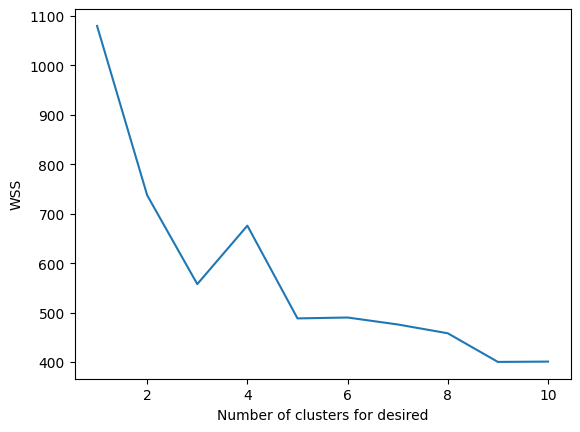

In [ ]:
# elbow plot:
plt.plot(np.linspace(1, kmax, kmax), calculate_WSS(data_scaled_desired, kmax))
plt.xlabel('Number of clusters for desired')
plt.ylabel('WSS')

Text(0, 0.5, 'WSS')

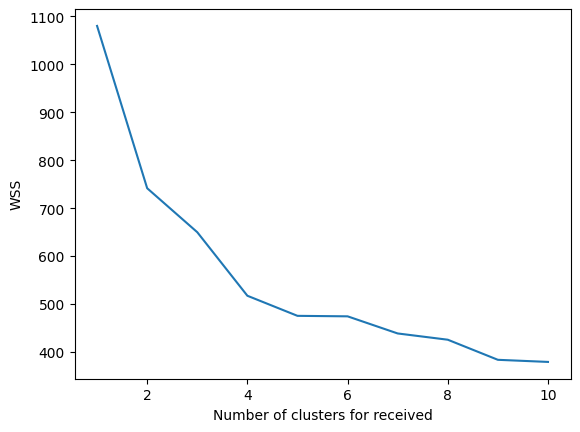

In [ ]:
# elbow plot:
plt.plot(np.linspace(1, kmax, kmax), calculate_WSS(data_scaled_received, kmax))
plt.xlabel('Number of clusters for received')
plt.ylabel('WSS')

Text(0, 0.5, 'WSS')

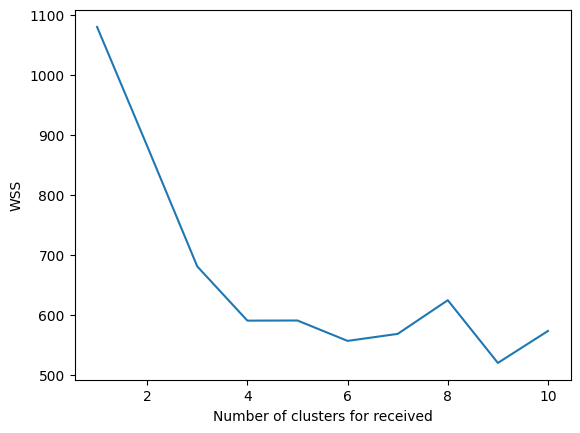

In [ ]:
# elbow plot:
plt.plot(np.linspace(1, kmax, kmax), calculate_WSS(data_scaled_difference, kmax))
plt.xlabel('Number of clusters for received')
plt.ylabel('WSS')

### Silhouette method

In [ ]:
def calculate_Silhouette(points, kmax):
  sil = []

  # dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
  for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(points)
    labels = kmeans.labels_
    sil.append(silhouette_score(points, labels, metric = 'euclidean'))

  return sil

Ten wykres poniżej z każdym utworzeniem bardzo się zmienia. Napisałem do Dominika, czy to jest ok, ale mi jeszcze nie odpisał. Na moje oko to jest ok, bo ilość klastrów nie jest oczywista.

EDIT: Odpisał. Dodałem random_state=3.
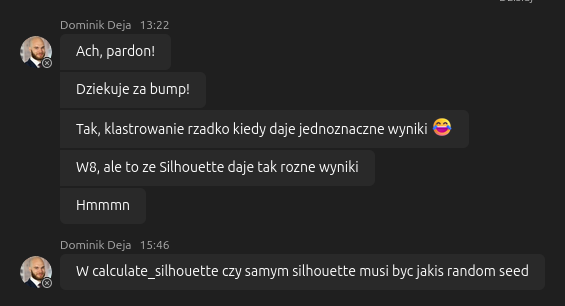

Text(0, 0.5, 'Silhouette')

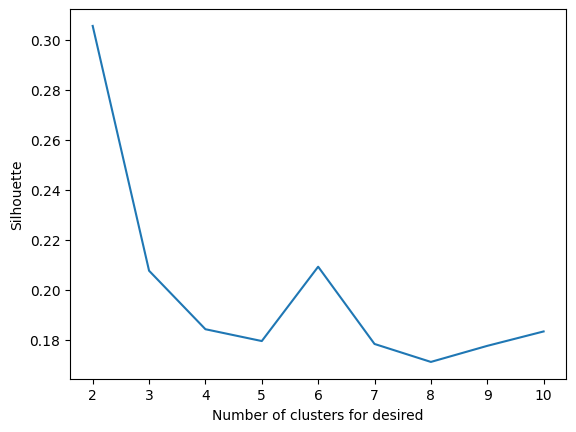

In [ ]:
# silhouette plot:
plt.plot(np.linspace(2, kmax, kmax-1), calculate_Silhouette(data_scaled_desired, kmax))
plt.xlabel('Number of clusters for desired')
plt.ylabel('Silhouette')

Text(0, 0.5, 'Silhouette')

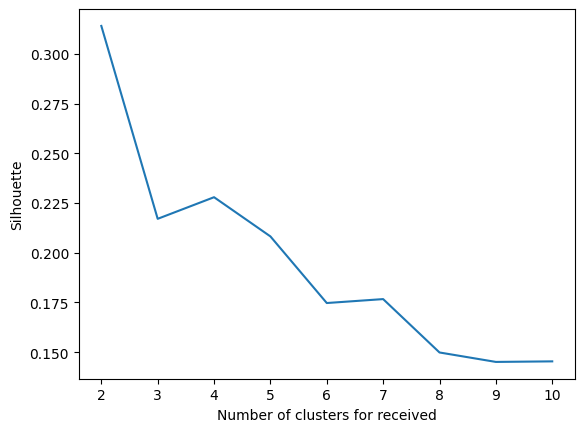

In [ ]:
# silhouette plot:
plt.plot(np.linspace(2, kmax, kmax-1), calculate_Silhouette(data_scaled_received, kmax))
plt.xlabel('Number of clusters for received')
plt.ylabel('Silhouette')

## Klasteryzacja - wybór liczby

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

In [ ]:
n_clusters_desired = 5
n_clusters_received = 4
n_clusters_difference = 5

### k-means (to jest poza zakresem zadania)

In [ ]:
from sklearn.cluster import KMeans

def kmeans_labels(data_scaled, n_clusters):
  kmeans = KMeans(n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
  labels = kmeans.fit_predict(data_scaled)
  return labels

### Agglomerative clustering

Nie jestem pewien czy dobrze go użyłem.
Wziąłem go stąd: https://www.geeksforgeeks.org/machine-learning/hierarchical-clustering/ i raczej kojarzy się z budowaniem drzew.
Żeby potem nie było spiny.

> **Na czym polega algorytm Agglomerative clustering?**

> Algorytm Agglomerative Clustering (klastrowanie aglomeracyjne) to typ hierarchicznego algorytmu klastrowania, który działa na zasadzie "od dołu do góry" (bottom-up). Oznacza to, że zaczyna się od pojedynczych punktów danych, a następnie łączy je w coraz większe klastry, aż do momentu spełnienia określonego kryterium stopu.

> Oto, jak działa krok po kroku:

> Początkowy stan: Na początku każdy punkt danych traktowany jest jako osobny klaster.
> Łączenie klastrów: W każdym kolejnym kroku algorytm znajduje dwa najbliższe sobie klastry i łączy je w jeden większy klaster.
> Powtarzanie: Proces łączenia powtarza się, aż do momentu, gdy wszystkie punkty danych zostaną połączone w jeden duży klaster, lub gdy osiągnięta zostanie wcześniej zdefiniowana liczba klastrów.

> Kluczowe pojęcia:

> Miara odległości (Distance Metric): Określa, jak obliczana jest "bliskość" między poszczególnymi punktami danych. Najczęściej używane to odległość euklidesowa, Manhattan, kosinusowa itp.

> Kryterium łączenia (Linkage Criterion): To najważniejsza część, która decyduje o tym, jak definiowana jest "bliskość" między dwoma klastrami. Istnieją różne metody:
> Single Linkage (najbliższy sąsiad): Odległość między dwoma klastrami to odległość między dwoma najbliższymi punktami (po jednym z każdego klastra). Ma tendencję do tworzenia długich, "rozciągniętych" klastrów.
> Complete Linkage (najdalszy sąsiad): Odległość między dwoma klastrami to odległość między dwoma najdalszymi punktami (po jednym z każdego klastra). Ma tendencję do tworzenia bardziej zwartych, kulistych klastrów.
> Average Linkage (średnia odległość): Odległość między dwoma klastrami to średnia odległość między wszystkimi parami punktów, gdzie jeden punkt pochodzi z jednego klastra, a drugi z drugiego.
> Ward's Method: Łączy klastry w taki sposób, aby minimalizować wariancję wewnątrz powstałych klastrów (lub zwiększać spójność klastrów). Jest często stosowany i działa dobrze dla klastrów o kulistym kształcie.

> Dendrogram: Wynikiem klastrowania aglomeracyjnego jest dendrogram – drzewiasta struktura, która wizualizuje hierarchię klastrów. Oś pionowa dendrogramu zazwyczaj przedstawia odległość, na której klastry zostały połączone. Możesz "uciąć" dendrogram na dowolnej wysokości, aby uzyskać pożądaną liczbę klastrów.

> Zalety:

> Hierarchiczna struktura: Tworzy hierarchię klastrów, co może być przydatne do eksploracji danych na różnych poziomach szczegółowości.
> Brak potrzeby określania k: Nie trzeba z góry określać liczby klastrów (k), można ją wybrać z dendrogramu po zakończeniu procesu.

> Wady:

> Złożoność obliczeniowa: Może być bardzo kosztowny obliczeniowo dla dużych zbiorów danych (zazwyczaj O(n^3) lub O(n^2 log n), gdzie n to liczba punktów).
> Brak możliwości cofnięcia: Raz połączone klastry nie mogą zostać rozdzielone, co może prowadzić do nieoptymalnych połączeń na wczesnym etapie.
> Wrażliwość na szum i wartości odstające: Niektóre metody łączenia (np. single linkage) są wrażliwe na szum.

> W Twoim notebooku, AgglomerativeClustering został użyty w komórce _sYwOvOfZh8J z domyślną miarą odległości (euklidesową) i domyślnym kryterium łączenia (ward). Liczba klastrów (n_clusters) została określona na 6.


In [ ]:
def agglomerative_clustering_labels(data_scaled, n_clusters):
  agglomerative_clustering = AgglomerativeClustering(n_clusters)
  labels = agglomerative_clustering.fit_predict(data_scaled)
  return labels

### DBSCAN

Trochę lipa, bo według DBSCAN jest tutaj przede wszystkim szum (te "-1"), chociaż to chyba dosyć normalne. Ciężko odnaleźć sensowne klastry.

> **Hej. Czemu labels w dbscan zawierają tylko -1 i 0?**

> Dzień dobry! Etykiety -1 i 0 w wyniku DBSCAN mają swoje specyficzne znaczenie:

> -1: Oznacza punkty sklasyfikowane jako szum (noise points). DBSCAN nie przypisał ich do żadnego klastra, ponieważ nie spełniły kryteriów gęstości.
> 0: Oznacza wszystkie punkty należące do jednego, głównego klastra. Jeśli widzisz tylko 0 i -1, oznacza to, że DBSCAN zidentyfikował jeden gęsty obszar danych i resztę jako szum.

> Dlaczego tak się dzieje?

> Najczęściej dzieje się tak z kilku powodów:

> Parametry eps i min_samples: DBSCAN jest bardzo wrażliwy na te parametry:
> eps (epsilon): Określa maksymalną odległość między dwoma próbkami, aby jedna była uważana za znajdującą się w sąsiedztwie drugiej. Jeśli eps jest za małe, większość punktów może zostać oznaczona jako szum (-1), ponieważ żaden punkt nie ma wystarczającej liczby sąsiadów w tak małym promieniu. Jeśli eps jest za duże, wszystkie punkty mogą zostać połączone w jeden duży klaster (0), a reszta to szum.
> min_samples: Minimalna liczba próbek w sąsiedztwie, aby punkt był uważany za rdzeń (core point). Jeśli min_samples jest za wysokie, trudno jest znaleźć punkty rdzeniowe, co również prowadzi do większej liczby punktów szumu lub mniejszej liczby klastrów.

> Struktura danych: Twoje dane mogą rzeczywiście tworzyć jeden duży, gęsty klaster, z kilkoma punktami odstającymi (szumem). DBSCAN dobrze radzi sobie z wykrywaniem klastrów o nieregularnych kształtach, ale jeśli dane są jednorodnie gęste, naturalne jest, że zidentyfikuje jeden dominujący klaster.

> Co możesz zrobić?

> Spróbuj poeksperymentować z wartościami eps i min_samples. Niestety, nie ma jednej uniwersalnej metody doboru tych parametrów, często wymaga to prób i błędów, a także wiedzy dziedzinowej o danych. Możesz również użyć metod doboru parametrów, takich jak analiza wykresu odległości k-najbliższych sąsiadów.

> Poniżej znajdziesz przykład, jak możesz zmienić parametr eps, aby zobaczyć, jak wpływa to na klastrowanie.


#### Eksperymentowanie z parametrem `eps`

In [ ]:
eps = 0.6
min_samples = 4

dbscan_eps = DBSCAN(eps=eps, min_samples=min_samples).fit(data_scaled_received)
dbscan_eps_labels = dbscan_eps.labels_
print(f"\nLiczba unikalnych etykiet dla eps={eps}:", len(np.unique(dbscan_eps_labels)))
print(f"Etykiety dla eps={eps}:", np.unique(dbscan_eps_labels))


Liczba unikalnych etykiet dla eps=0.6: 8
Etykiety dla eps=0.6: [-1  0  1  2  3  4  5  6]


In [ ]:
def dbscan_labels(data_scaled):
  db = DBSCAN(eps, min_samples).fit(data_scaled)
  core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
  core_samples_mask[db.core_sample_indices_] = True
  labels = db.labels_
  return labels

> Hej. Jaki algorytm klasteryzacji jeszcze można zaimplementować?

> Dzień dobry! Dobrym algorytmem do zaimplementowania, zwłaszcza jeśli DBSCAN miał problem z wykryciem wielu klastrów (co sugeruje problem z różnymi gęstościami danych), jest HDBSCAN (Hierarchical Density-Based Spatial Clustering of Applications with Noise).

> HDBSCAN jest rozwinięciem DBSCAN i radzi sobie znacznie lepiej z klastrami o różnej gęstości, ponieważ nie wymaga jednego globalnego parametru eps. Zamiast tego, tworzy hierarchiczną reprezentację klastrów i pozwala na wydobycie klastrów o różnej gęstości.

> Poniżej znajduje się kod do zaimplementowania HDBSCAN i wyświetlenia uzyskanych etykiet.


### HDBSCAN

In [ ]:
import hdbscan

def hdbscan_labels(data_scaled):
  hdbscan_clusterer = hdbscan.HDBSCAN(min_cluster_size=min_samples, min_samples=None, cluster_selection_epsilon=eps, prediction_data=True)
  labels = hdbscan_clusterer.fit_predict(data_scaled)
  return labels

[AI] HDBSCAN, podobnie jak DBSCAN, oznacza szum jako `-1`. Zauważ, czy tym razem jest więcej zidentyfikowanych klastrów niż w przypadku DBSCAN.

In [ ]:
hdbscan_labels_desired = hdbscan_labels(data_scaled_desired)
print(f"Liczba unikalnych etykiet dla HDBSCAN: {len(np.unique(hdbscan_labels_desired))}")
print(f"Etykiety dla HDBSCAN: {np.unique(hdbscan_labels_desired)}")

Liczba unikalnych etykiet dla HDBSCAN: 8
Etykiety dla HDBSCAN: [-1  0  1  2  3  4  5  6]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


^^^ no nie bardzo

Próbowałem zaimplementować algorytm k-medoids, ale jupiter zgłaszał problemy z różnicą wersji numpy. Poddałem się.

> Wolę zostać przy nowszej wersji numpy. A może zaproponujesz jeszcze inny algorytm oparty na centroidach?

> Rozumiem, że chcesz pozostać przy nowszej wersji NumPy. W takim razie, zamiast K-Medoids, mogę zaproponować algorytm MiniBatchKMeans.

> MiniBatchKMeans to wariant algorytmu K-Means, który używa losowych podzbiorów danych (mini-batchy) do aktualizacji centroidów, co znacząco przyspiesza obliczenia, zwłaszcza dla dużych zbiorów danych. Nadal jest to algorytm oparty na centroidach, ale może być bardziej efektywny niż standardowy K-Means i nie powinien mieć problemów z kompatybilnością z NumPy 2.0.2.

> Poniżej znajduje się kod do zaimplementowania MiniBatchKMeans.


### MiniBatchKMeans

In [ ]:
from sklearn.cluster import MiniBatchKMeans

def minibatch_kmeans_labels(data_scaled, n_clusters):
  minibatch_kmeans = MiniBatchKMeans(n_clusters=n_clusters, random_state=0, n_init=10)
  labels = minibatch_kmeans.fit_predict(data_scaled)
  return labels

> A znasz jeszcze inny algorytm ani oparty na centroidach ani na gęstości?


> Tak, zdecydowanie! Jeśli chcemy odejść od algorytmów opartych na centroidach i gęstości, doskonałym wyborem jest Gaussian Mixture Models (GMM).

> GMM to algorytm klastrowania modelowego, który zakłada, że punkty danych są generowane z mieszaniny kilku rozkładów Gaussa (normalnych). Zamiast przypisywać każdy punkt do konkretnego klastra (jak K-Means czy DBSCAN), GMM przypisuje punktom prawdopodobieństwo przynależności do każdego klastra. Jest to podejście bardziej elastyczne, które może dobrze działać w przypadku, gdy klastry mają eliptyczne kształty lub różnią się wielkością.

> Poniżej znajduje się kod do zaimplementowania GMM.





### Gaussian Mixture Models (GMM)

In [ ]:
from sklearn.mixture import GaussianMixture

def gmm_labels(data_scaled, n_clusters):
  gmm = GaussianMixture(n_components=n_clusters, random_state=0)
  gmm.fit(data_scaled)
  labels = gmm.predict(data_scaled)
  return labels

## Wybór metody

In [ ]:
labels_desired = kmeans_labels(data_scaled_desired, n_clusters_desired)
labels_received = kmeans_labels(data_scaled_received, n_clusters_received)
labels_difference = kmeans_labels(data_scaled_difference, n_clusters_difference)

# funkcja robiąca relabelling bazując na częstości występowania - po to aby kolory się zgadzały na rysunkach
def relabel(data_labels):
  # Calculate label frequencies
  label_counts = pd.Series(data_labels).value_counts().sort_values(ascending=False)

  # Create a mapping from original label to new, frequency-ordered label
  label_mapping = {original_label: new_label for new_label, original_label in enumerate(label_counts.index)}

  # Apply the mapping to reorder labels
  data_labels = pd.Series(data_labels).map(label_mapping).values.astype(int)
  return data_labels

labels_desired = relabel(labels_desired)
labels_received = relabel(labels_received)
labels_difference = relabel(labels_difference)

# labels_desired = agglomerative_clustering_labels(data_scaled_desired, n_clusters_desired)
# labels_received = agglomerative_clustering_labels(data_scaled_received, n_clusters_received)

#NIE DZIAŁA
# labels_desired = db_labels(data_scaled_desired, n_clusters_desired)
# labels_received = db_labels(data_scaled_received, n_clusters_received)

#NIE DZIAŁA
# labels_desired = hdbscan_labels(data_scaled_desired, n_clusters_desired)
# labels_received = hdbscan_labels(data_scaled_received, n_clusters_received)

# labels_desired = minibatch_kmeans_labels(data_scaled_desired, n_clusters_desired)
# labels_received = minibatch_kmeans_labels(data_scaled_received, n_clusters_received)

# labels_desired = gmm_labels(data_scaled_desired, n_clusters_desired)
# labels_received = gmm_labels(data_scaled_received, n_clusters_received)

labels_desired, len(labels_desired)

(array([0, 2, 3, 0, 3, 1, 0, 0, 2, 2, 2, 2, 0, 2, 3, 4, 3, 0, 4, 4, 0, 1,
        3, 0, 0, 0, 0, 0, 0, 2, 3, 3, 3, 2, 0, 3, 4, 0, 2, 2, 1, 1, 0, 3,
        1, 2, 2, 1, 2, 3, 2, 4, 2, 1, 0, 0, 0, 0, 2, 3, 1, 0, 0, 2, 0, 4,
        0, 4, 0, 2, 2, 0, 3, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 3,
        0, 0, 1, 0, 1, 2, 2, 1, 1, 4, 2, 4, 0, 2, 3, 2, 3, 3, 1, 0, 0, 0,
        0, 3, 0, 0, 4, 2, 2, 2, 4, 4, 0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 2, 2, 0, 0, 1, 0, 0, 0, 0, 1, 1, 4, 1, 2, 1, 3, 2, 1, 0, 1,
        0, 0, 0, 1, 2, 0, 1, 3, 1, 0, 0, 0, 1, 0, 3, 3, 2, 1, 0, 3, 0, 3,
        2, 1, 2, 3, 3, 4, 2, 3, 3, 1, 2, 4, 2, 2, 0, 1, 2, 1, 3, 0, 0, 0,
        3, 0, 3, 1, 1, 1, 0, 0, 4, 1, 

In [ ]:
data_labels_desired = pd.concat([
    pd.DataFrame(data_scaled_desired),
    pd.DataFrame(labels_desired, columns=['labels'])], axis=1)
data_labels_desired.columns = ['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'labels']
data_labels_desired.index.name = 'id'
# data_labels_desired['id'] = data_subset_desired.index.values # Add 'id' as a column
# data_labels_desired_tmp = data_labels_desired.set_index('id') # Set 'id' as index
data_labels_desired_tmp

,attr,sinc,intel,fun,amb,shar,labels
id,,,,,,,
1,-0.590894,0.373452,-0.024994,-0.396583,0.671179,0.490330,0
2,1.766338,-1.707232,0.702685,0.410884,-1.736622,-1.054629,2
3,0.980594,-1.013671,2.158043,-1.204050,-0.131421,-1.827108,3
4,-0.198022,0.373452,-0.024994,0.410884,-0.131421,-0.282149,0
5,-0.198022,-1.707232,0.702685,1.218351,-0.131421,0.490330,3
...,...,...,...,...,...,...,...
548,1.373466,-1.013671,-0.024994,-1.204050,-1.736622,1.262809,4
549,-0.198022,0.373452,-0.024994,0.410884,-1.736622,1.262809,1
550,0.587722,-1.984657,1.430364,2.025819,-1.255061,-1.209124,2


In [ ]:
data_labels_received = pd.concat([
    pd.DataFrame(data_scaled_received),
    pd.DataFrame(labels_received, columns=['labels'])], axis=1)
data_labels_received.columns = ['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'labels']
# data_labels_received.index.name = 'id'
# data_labels_received['id'] = data_subset_received.index.values # Add 'id' as a column
# data_labels_received_tmp = data_labels_received.set_index('id') # Set 'id' as index
data_labels_received_tmp

,attr,sinc,intel,fun,amb,shar,labels
id,,,,,,,
1,0.427975,0.266098,0.962500,0.759091,1.529484,1.688165,1
2,1.271508,-0.169147,0.801217,1.055264,0.878498,1.056500,1
3,0.259269,-0.169147,-0.166482,-0.228154,0.372176,0.530112,0
4,0.681035,-0.169147,0.478650,1.055264,1.138892,1.793442,1
5,-0.752970,0.701343,0.317367,0.759091,1.269089,0.740667,1
...,...,...,...,...,...,...,...
548,0.560530,-2.041392,-1.187942,-0.707673,-0.879163,-1.101690,2
549,0.132739,-0.822015,-0.892256,0.216106,-1.074459,-0.405688,0
550,-0.891003,-2.028830,-1.456747,-1.143600,-0.601015,-1.374910,2


In [ ]:
data_labels_difference = pd.concat([
    pd.DataFrame(data_scaled_difference),
    pd.DataFrame(labels_difference, columns=['labels'])], axis=1)
data_labels_difference.columns = ['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'labels']
# data_labels_difference.index.name = 'id'
# data_labels_difference['id'] = data_subset_temp.index.values # Add 'id' as a column
# data_labels_difference_tmp = data_labels_difference.set_index('id') # Set 'id' as index
data_labels_difference_tmp


,attr,sinc,intel,fun,amb,shar,labels
id,,,,,,,
1,-0.751329,0.078549,-0.697738,-0.879799,-0.580408,-0.819697,1
2,0.364895,-1.125385,-0.069620,-0.490558,-1.768411,-1.444677,4
3,0.531916,-0.617921,1.642450,-0.742937,-0.340545,-1.613082,1
4,-0.648230,0.397009,-0.355863,-0.490558,-0.859019,-1.420359,1
5,0.409227,-1.762305,0.272255,0.349629,-0.947061,-0.171310,4
...,...,...,...,...,...,...,...
548,0.599471,0.751962,0.821709,-0.377885,-0.579835,1.618063,2
549,-0.243908,0.874699,0.612785,0.148282,-0.447772,1.141778,2
550,1.090434,0.032321,2.039959,2.412837,-0.442283,0.113450,3


In [ ]:
# analysis = data_labels_desired.groupby(['labels']).mean()
# color_key=[[0, 'blue'], [1, 'red'], [2, 'green'], [3,'yellow'],[4,'cyan']]

# color_key_df = pd.DataFrame(color_key, columns=['labels', 'color'])
# analysis = pd.merge(analysis, color_key_df, on='labels')
# analysis

## Wizualizacja

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

### PCA

In [ ]:
pca = PCA(n_components=2)

In [ ]:
data_subset_pca_desired = pca.fit_transform(data_scaled_desired)
# print('Linear Transformation Components (PCA Components):\n', pca.components_)
pca_desired_components=pca.components_
print('Linear Transformation Components (PCA Components):\n', pca_desired_components)
# data_subset_pca_desired #Transformed dataset

Linear Transformation Components (PCA Components):
 [[ 0.67237859 -0.36528396 -0.17279158  0.08783047 -0.43416173 -0.4340589 ]
 [-0.25258829 -0.34054274  0.03827004  0.8448987   0.25309983 -0.20211843]]


In [ ]:
data_subset_pca_received = pca.fit_transform(data_scaled_received)
# print('Linear Transformation Components (PCA Components):\n', pca.components_)
pca_received_components=pca.components_
print('Linear Transformation Components (PCA Components):\n', pca_received_components)
# data_subset_pca_received #Transformed dataset

Linear Transformation Components (PCA Components):
 [[ 0.39470469  0.36283223  0.40027863  0.44632136  0.38373857  0.45373996]
 [-0.47125726  0.41228218  0.53422332 -0.37292133  0.31482543 -0.29044807]]


In [ ]:
data_subset_pca_difference = pca.fit_transform(data_scaled_difference)
# print('Linear Transformation Components (PCA Components):\n', pca.components_)
pca_difference_components=pca.components_
print('Linear Transformation Components (PCA Components):\n', pca_difference_components)
# data_subset_pca_difference #Transformed dataset

Linear Transformation Components (PCA Components):
 [[ 0.04889754  0.46582587  0.45990026  0.3868151   0.45806761  0.45788119]
 [ 0.72835868 -0.02940467 -0.27756987  0.39285573 -0.39110939  0.29031325]]


In [ ]:
# TF = #Transformed dataset
df_pca_desired_temp = pd.DataFrame(data_subset_pca_desired, columns=['PC1', 'PC2'])
df_pca_desired_temp['labels'] = labels_desired
df_pca_desired_temp['id'] = data_subset_desired.index.values # Add 'id' as a column
df_pca_desired_temp = df_pca_desired_temp.set_index('id') # Set 'id' as index
df_pca_desired_temp

,PC1,PC2,labels
id,,,
1,-1.068466,-0.243182,0
2,2.937688,0.282898,2
3,1.401095,-0.501171,3
4,-0.049627,0.292806,0
5,0.320295,1.555312,3
...,...,...,...
548,1.398175,-1.714756,4
549,-0.023314,-0.425735,1
550,2.120640,2.220491,2


In [ ]:
df_pca_received_temp = pd.DataFrame(data_subset_pca_received, columns=['PC1', 'PC2'])
df_pca_received_temp['labels'] = labels_received
df_pca_received_temp['id'] = data_subset_received.index.values # Add 'id' as a column
df_pca_received_temp = df_pca_received_temp.set_index('id') # Set 'id' as index
df_pca_received_temp

,PC1,PC2,labels
id,,,
1,2.342449,0.130326,1
2,2.048685,-0.664730,1
3,0.255844,-0.232573,0
4,2.120810,-0.690853,1
5,1.246171,0.714874,1
...,...,...,...
548,-2.148046,-1.433302,2
549,-1.102947,-1.179146,0
550,-3.035810,-0.558189,2


In [ ]:
df_pca_difference_temp = pd.DataFrame(data_subset_pca_difference, columns=['PC1', 'PC2'])
df_pca_difference_temp['labels'] = labels_difference
df_pca_difference_temp['id'] = data_subset_temp.index.values # Add 'id' as a column
df_pca_difference_temp = df_pca_difference_temp.set_index('id') # Set 'id' as index
df_pca_difference_temp

,PC1,PC2,labels
id,,,
1,-1.302547,-0.712476,1
2,-2.199707,0.397705,4
3,-0.688443,-0.677275,1
4,-1.244021,-0.654138,1
5,-1.052722,0.732339,4
...,...,...,...
548,1.086605,0.734507,2
549,1.052398,0.191391,2
550,1.789226,1.380859,3


Gdyby ktoś się tym bawił i w komórce niżej pojawił się błąd

> ValueError: 'c' argument must be a color, a sequence of colors

To znaczy, że klastrów jest więcej niż przewidzianych kolorów.
Możesz zmienić c na 'labels' i wtedy będzie czarno-białe.

In [ ]:
# data_subset_pca_plot = data_subset_tf_pca_desired
# data_subset_pca_plot = data_subset_tf_pca_received

# data_subset_pca_labels = data_subset_tf_pca_desired
# data_subset_pca_labels = data_subset_tf_pca_received

# data_subset_pca_arrows = data_subset_desired
# data_subset_pca_arrows = data_subset_received

### After-processing filtering based on Age/Gender

In [ ]:
# ZOSTAWIĆ DLA WSZYSTKICH
# Merge pca_desired with data_subset_id on their indices
data_subset_tf_pca_desired = df_pca_desired_temp.merge(data_subset_id, left_index=True, right_index=True, how='left')
data_subset_tf_pca_received = df_pca_received_temp.merge(data_subset_id, left_index=True, right_index=True, how='left')
data_subset_tf_pca_difference = df_pca_difference_temp.merge(data_subset_id, left_index=True, right_index=True, how='left')

# --- Merging and Filtering for data_labels dataframes ---
# Merge with data_subset_id to get 'age' and 'gender'
data_labels_desired = data_labels_desired_tmp.merge(data_subset_id, left_index=True, right_index=True, how='left')
data_labels_received = data_labels_received_tmp.merge(data_subset_id, left_index=True, right_index=True, how='left')
data_labels_difference = data_labels_difference_tmp.merge(data_subset_id, left_index=True, right_index=True, how='left')

# # --- Filtering conditions (uncomment and modify as needed) ---

# # Filter for women (gender == 0)
# data_subset_tf_pca_desired = data_subset_tf_pca_desired[data_subset_tf_pca_desired['gender'] == 0]
# data_subset_tf_pca_received = data_subset_tf_pca_received[data_subset_tf_pca_received['gender'] == 0]
# data_subset_tf_pca_difference = data_subset_tf_pca_difference[data_subset_tf_pca_difference['gender'] == 0]
# data_labels_desired = data_labels_desired[data_labels_desired['gender'] == 0]
# data_labels_received = data_labels_received[data_labels_received['gender'] == 0]
# data_labels_difference = data_labels_difference[data_labels_difference['gender'] == 0]

# # Filter for men (gender == 1)
# data_subset_tf_pca_desired = data_subset_tf_pca_desired[data_subset_tf_pca_desired['gender'] == 1]
# data_subset_tf_pca_received = data_subset_tf_pca_received[data_subset_tf_pca_received['gender'] == 1]
# data_subset_tf_pca_difference = data_subset_tf_pca_difference[data_subset_tf_pca_difference['gender'] == 1]
# data_labels_desired = data_labels_desired[data_labels_desired['gender'] == 1]
# data_labels_received = data_labels_received[data_labels_received['gender'] == 1]
# data_labels_difference = data_labels_difference[data_labels_difference['gender'] == 1]

# # Filter for age less than 27
# data_subset_tf_pca_desired = data_subset_tf_pca_desired[data_subset_tf_pca_desired['age'] < 27]
# data_subset_tf_pca_received = data_subset_tf_pca_received[data_subset_tf_pca_received['age'] < 27]
# data_subset_tf_pca_difference = data_subset_tf_pca_difference[data_subset_tf_pca_difference['age'] < 27]
# data_labels_desired = data_labels_desired[data_labels_desired['age'] < 27]
# data_labels_received = data_labels_received[data_labels_received['age'] < 27]
# data_labels_difference = data_labels_difference[data_labels_difference['age'] < 27]


# # Filter for age less than 27
# data_subset_tf_pca_desired = data_subset_tf_pca_desired[data_subset_tf_pca_desired['age'] >= 27]
# data_subset_tf_pca_received = data_subset_tf_pca_received[data_subset_tf_pca_received['age'] >= 27]
# data_subset_tf_pca_difference = data_subset_tf_pca_difference[data_subset_tf_pca_difference['age'] >= 27]
# data_labels_desired = data_labels_desired[data_labels_desired['age'] >= 27]
# data_labels_received = data_labels_received[data_labels_received['age'] >= 27]
# data_labels_difference = data_labels_difference[data_labels_difference['age'] >= 27]


# # --------- Define the condition based on data_labels_received
# # Example: Select 'id's where the label in data_labels_received is 0
# # You can change this condition to select different labels or apply other criteria
# selected_ids = data_labels_received[data_labels_received['labels'] == 2].index
# # Filter the data for the desired PCA plot using the selected 'id's
# data_subset_tf_pca_desired=data_subset_tf_pca_desired[data_subset_tf_pca_desired.index.isin(selected_ids)]
# data_labels_desired=data_labels_desired[data_labels_desired.index.isin(selected_ids)]

# # Drop 'gender' and 'age' columns after filtering
# data_labels_desired = data_labels_desired.drop(columns=['age', 'gender'], errors='ignore')
# data_labels_received = data_labels_received.drop(columns=['age', 'gender'], errors='ignore')
# data_labels_difference = data_labels_difference.drop(columns=['age', 'gender'], errors='ignore')

# Display the first few rows of the desired dataframe to show the effect of merging
data_subset_tf_pca_desired

,PC1,PC2,labels,age,gender
id,,,,,
1,-1.068466,-0.243182,0,21.0,0
2,2.937688,0.282898,2,24.0,0
3,1.401095,-0.501171,3,25.0,0
4,-0.049627,0.292806,0,23.0,0
5,0.320295,1.555312,3,21.0,0
...,...,...,...,...,...
548,1.398175,-1.714756,4,30.0,1
549,-0.023314,-0.425735,1,28.0,1
550,2.120640,2.220491,2,30.0,1


#### Desired


PC1 Components: [ 0.67237859 -0.36528396 -0.17279158  0.08783047 -0.43416173 -0.4340589 ]
PC2 Components: [-0.25258829 -0.34054274  0.03827004  0.8448987   0.25309983 -0.20211843]


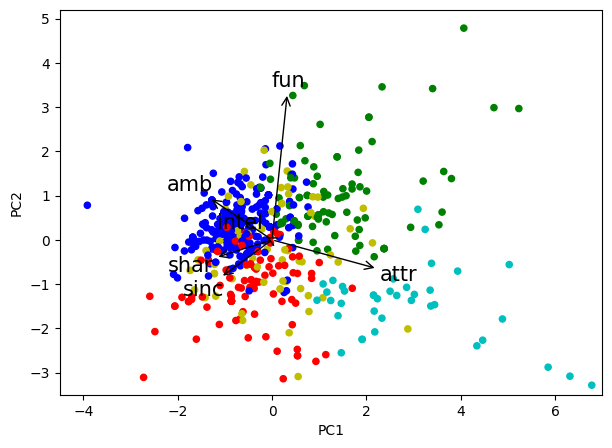

In [ ]:
data=data_subset_tf_pca_desired
arrows=data_subset_desired
pca_components=pca_desired_components
# arrows=pd.DataFrame(data_scaled_desired, columns=['attr', 'sinc', 'intel', 'fun', 'amb', 'shar'])
data.plot.scatter(x='PC1', y='PC2', c=data.labels.replace([-1, 0, 1, 2, 3, 4, 5], ['k', 'b', 'r', 'g', 'y', 'c', 'm']), figsize=(7,5))
# wymiary rysunku - jeśli domyślne, zakomentuj
plt.xlim(-4.5, 7)
plt.ylim(-3.5, 5.2)
for i, colname in enumerate(arrows.columns):
    plt.annotate(colname, ha='center', va='bottom', xy=(0, 0), size=15,
             xytext=(pca_components[0,i]*4, pca_components[1,i]*4),
             arrowprops = {'arrowstyle':'<-'})

print("\nPC1 Components:", pca_components[0])
print("PC2 Components:", pca_components[1])

In [ ]:
# Combine PCA components with original scaled features and labels
combined_data_for_summary = data_labels_desired.copy()
combined_data_for_summary['PC1'] = data_subset_tf_pca_desired['PC1']
combined_data_for_summary['PC2'] = data_subset_tf_pca_desired['PC2']

# Group by labels and calculate the mean for all specified columns
summary_table = combined_data_for_summary.groupby('labels')[['PC1', 'PC2', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar']].mean()

# Add the count of each group label
label_counts = combined_data_for_summary['labels'].value_counts().reset_index()
label_counts.columns = ['labels', 'count']
summary_table = pd.merge(summary_table, label_counts, on='labels')

# Add the color column
color_key=[[0, 'blue'], [1, 'red'], [2, 'green'], [3,'yellow'],[4,'cyan']]
color_key_df = pd.DataFrame(color_key, columns=['labels', 'color'])
summary_table = pd.merge(summary_table, color_key_df, on='labels')

# Display the summary table
display(summary_table)

# Calculate the weighted mean for each attribute, weighted by count
attributes = ['attr', 'sinc', 'intel', 'fun', 'amb', 'shar']
weighted_means = {}
for attr in attributes:
    weighted_sum = (summary_table[attr] * summary_table['count']).sum()
    total_count = summary_table['count'].sum()
    weighted_means[attr] = weighted_sum / total_count

print("\nWeighted Mean of Attributes (summed for all labels together, weighted by count):")
for attr, value in weighted_means.items():
    print(f"{value:.4f}")
    # print(f"{attr}: {value:.4f}")

,labels,PC1,PC2,attr,sinc,intel,fun,amb,shar,count,color
0,0,-0.715705,0.306204,-0.447106,0.024159,-0.167654,0.076860,0.76610,0.251956,254,blue
1,1,-0.504981,-1.034227,-0.250562,1.232868,-0.122113,-0.512392,-0.66822,0.351045,97,red
2,2,1.411222,1.040778,0.556265,-0.409626,-0.167553,1.255789,-0.79353,-0.930295,88,green
3,3,-0.024526,-0.220293,-0.125459,-0.730566,1.704456,-0.510372,-0.43139,0.126676,63,yellow
4,4,2.845521,-1.451733,2.547947,-1.148733,-1.005446,-1.267798,-0.86221,-0.635864,38,cyan



Weighted Mean of Attributes (summed for all labels together, weighted by count):
0.0000
0.0000
-0.0000
0.0000
-0.0000
-0.0000


#### Received


PC1 Components: [0.39470469 0.36283223 0.40027863 0.44632136 0.38373857 0.45373996]
PC2 Components: [-0.47125726  0.41228218  0.53422332 -0.37292133  0.31482543 -0.29044807]


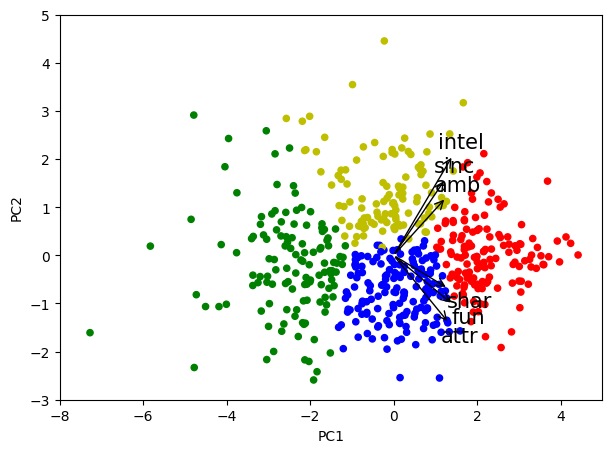

In [ ]:
data=data_subset_tf_pca_received
arrows=data_subset_received
pca_components=pca_received_components
# arrows=pd.DataFrame(data_scaled_desired, columns=['attr', 'sinc', 'intel', 'fun', 'amb', 'shar'])
data.plot.scatter(x='PC1', y='PC2', c=data.labels.replace([-1, 0, 1, 2, 3, 4, 5], ['k', 'b', 'r', 'g', 'y', 'c', 'm']), figsize=(7,5))
# wymiary rysunku - jeśli domyślne, zakom/entuj
plt.xlim(-8, 5)
plt.ylim(-3, 5)
for i, colname in enumerate(arrows.columns):
    plt.annotate(colname, ha='center', va='bottom', xy=(0, 0), size=15,
             xytext=(pca_components[0,i]*4, pca_components[1,i]*4),
             arrowprops = {'arrowstyle':'<-'})

print("\nPC1 Components:", pca_components[0])
print("PC2 Components:", pca_components[1])

In [ ]:
# Combine PCA components with original scaled features and labels
combined_data_for_summary = data_labels_received.copy()
combined_data_for_summary['PC1'] = data_subset_tf_pca_received['PC1']
combined_data_for_summary['PC2'] = data_subset_tf_pca_received['PC2']

# Group by labels and calculate the mean for all specified columns
summary_table = combined_data_for_summary.groupby('labels')[['PC1', 'PC2', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar']].mean()

# Add the count of each group label
label_counts = combined_data_for_summary['labels'].value_counts().reset_index()
label_counts.columns = ['labels', 'count']
summary_table = pd.merge(summary_table, label_counts, on='labels')

# Add the color column
color_key=[[0, 'blue'], [1, 'red'], [2, 'green'], [3,'yellow'], [4,'cyan']]
color_key_df = pd.DataFrame(color_key, columns=['labels', 'color'])
summary_table = pd.merge(summary_table, color_key_df, on='labels')

# Display the summary table
display(summary_table)

,labels,PC1,PC2,attr,sinc,intel,fun,amb,shar,count,color
0,0,0.118224,-0.756808,0.413198,-0.245253,-0.386436,0.325409,-0.176442,0.267270,165,blue
1,1,2.230147,0.018364,0.881067,0.739381,0.929185,0.978495,0.915026,1.001295,140,red
2,2,-2.519053,-0.203107,-0.909218,-1.065181,-1.087522,-1.067532,-1.001470,-1.052633,123,green
3,3,-0.195394,1.315040,-0.711547,0.606881,0.602154,-0.530138,0.215983,-0.489349,112,yellow


#### Difference


PC1 Components: [0.04889754 0.46582587 0.45990026 0.3868151  0.45806761 0.45788119]
PC2 Components: [ 0.72835868 -0.02940467 -0.27756987  0.39285573 -0.39110939  0.29031325]


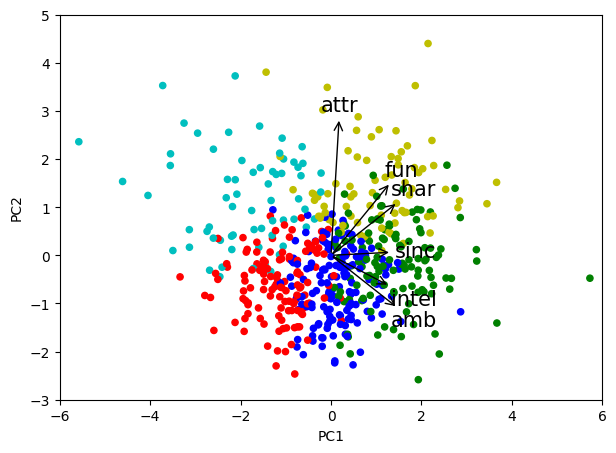

In [ ]:
# df_diff_desired_received = df_desired - df_received
# oczekiwana - otrzymana
data=data_subset_tf_pca_difference
arrows=df_scaled_difference
pca_components=pca_difference_components
# arrows=pd.DataFrame(data_scaled_desired, columns=['attr', 'sinc', 'intel', 'fun', 'amb', 'shar'])
data.plot.scatter(x='PC1', y='PC2', c=data.labels.replace([-1, 0, 1, 2, 3, 4, 5], ['k', 'b', 'r', 'g', 'y', 'c', 'm']), figsize=(7,5))
# wymiary rysunku - jeśli domyślne, zakom/entuj
plt.xlim(-6, 6)
plt.ylim(-3, 5)
for i, colname in enumerate(arrows.columns):
    plt.annotate(colname, ha='center', va='bottom', xy=(0, 0), size=15,
             xytext=(pca_components[0,i]*4, pca_components[1,i]*4),
             arrowprops = {'arrowstyle':'<-'})

print("\nPC1 Components:", pca_components[0])
print("PC2 Components:", pca_components[1])

In [ ]:
# Combine PCA components with original scaled features and labels
combined_data_for_summary = data_labels_difference.copy()
combined_data_for_summary['PC1'] = data_subset_tf_pca_difference['PC1']
combined_data_for_summary['PC2'] = data_subset_tf_pca_difference['PC2']

# Group by labels and calculate the mean for all specified columns
summary_table = combined_data_for_summary.groupby('labels')[['PC1', 'PC2', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar']].mean()

# Add the count of each group label
label_counts = combined_data_for_summary['labels'].value_counts().reset_index()
label_counts.columns = ['labels', 'count']
summary_table = pd.merge(summary_table, label_counts, on='labels')

# Add the color column
color_key=[[0, 'blue'], [1, 'red'], [2, 'green'], [3,'yellow'], [4,'cyan']]
color_key_df = pd.DataFrame(color_key, columns=['labels', 'color'])
summary_table = pd.merge(summary_table, color_key_df, on='labels')

# Display the summary table
display(summary_table)

,labels,PC1,PC2,attr,sinc,intel,fun,amb,shar,count,color
0,0,0.155359,-0.609777,-0.512086,-0.139646,-0.102411,-0.254699,0.612172,0.241665,152,blue
1,1,-1.140871,-0.607427,-0.735787,-0.398537,-0.325289,-0.379503,-0.543587,-0.816470,126,red
2,2,1.412742,-0.180586,0.233588,1.004779,1.093313,0.177966,0.464971,0.324593,118,green
3,3,0.979010,1.419765,0.771502,0.200332,-0.204024,1.396361,-0.005660,0.882883,79,yellow
4,4,-1.906312,1.205688,1.262065,-0.968436,-0.866770,-0.688936,-1.215041,-0.644734,65,cyan


In [ ]:
import numpy as np

# [attr, sinc, intel, fun, amb, shar]

# Gdzie jest ktoś kto zawyżył swoją atrakcyjność?
print(np.matmul(pca.components_, np.array([10, 0, 0, 0, 0, 0])))

# Gdzie jest ktoś kto zaniżył swoją atrakcyjność?
print(np.matmul(pca.components_, np.array([-10, 0, 0, 0, 0, 0])))

# Gdzie jest ktoś kto zawyżył swoją inteligecję i szczerość?
print(np.matmul(pca.components_, np.array([0, 10, 10, 0, 0, 0])))

[0.48897542 7.2835868 ]
[-0.48897542 -7.2835868 ]
[ 9.25726128 -3.06974541]


## TSNE

In [ ]:
# tsne = TSNE(n_components = 2)
tsne = TSNE(n_components = 2, perplexity=100, random_state = 15161)

In [ ]:
tsne_data_desired = tsne.fit_transform(data_scaled_desired)
tsne_data_desired

array([[-2.9388413,  2.3577008],
       [ 4.393046 , -7.1720324],
       [ 2.3753848, -7.857294 ],
       ...,
       [ 4.149712 , -5.7811456],
       [ 6.771974 , -2.70319  ],
       [ 6.0728183, -8.374893 ]], dtype=float32)

In [ ]:
tsne_data_received = tsne.fit_transform(data_scaled_received)
tsne_data_received

array([[ 7.9151554 ,  0.9086053 ],
       [ 7.207724  , -2.0056725 ],
       [ 0.77999073, -1.6453992 ],
       ...,
       [-8.198625  , -0.5060027 ],
       [-4.69674   , -1.5035175 ],
       [-6.402486  , -3.3894668 ]], dtype=float32)

In [ ]:
data_subset_tf_tsne_desired = pd.concat([pd.DataFrame(tsne_data_desired, columns=['Dim1', 'Dim2']),
                           pd.DataFrame(labels_desired, columns=['labels'])], axis=1)
data_subset_tf_tsne_desired

,Dim1,Dim2,labels
0,-2.938841,2.357701,0
1,4.393046,-7.172032,2
2,2.375385,-7.857294,3
3,2.225827,-0.568267,0
4,0.418883,-5.473903,3
...,...,...,...
535,2.986069,-9.724802,4
536,-2.109443,-3.591103,1
537,4.149712,-5.781146,2
538,6.771974,-2.703190,2


In [ ]:
# data_tsne_desired = pd.concat([
#     pd.DataFrame(tsne_data_desired, columns=['Dim1', 'Dim2']),
#     pd.DataFrame(labels_desired, columns=['labels'])], axis=1)

In [ ]:
data_subset_tf_tsne_received = pd.concat([pd.DataFrame(tsne_data_received, columns=['Dim1', 'Dim2']),
                           pd.DataFrame(labels_received, columns=['labels'])], axis=1)
data_subset_tf_tsne_received

,Dim1,Dim2,labels
0,7.915155,0.908605,1
1,7.207724,-2.005672,1
2,0.779991,-1.645399,0
3,7.443304,-2.208909,1
4,4.534235,2.279308,1
...,...,...,...
535,-6.321918,-3.021379,2
536,-3.999890,-2.440048,0
537,-8.198625,-0.506003,2
538,-4.696740,-1.503518,2


In [ ]:
data_subset_tsne_plot = data_subset_tf_tsne_desired
# data_subset_tsne_plot = data_subset_tf_tsne_received

data_subset_tsne_labels = data_subset_tf_tsne_desired
# data_subset_tsne_labels = data_subset_tf_tsne_received

<Axes: xlabel='Dim1', ylabel='Dim2'>

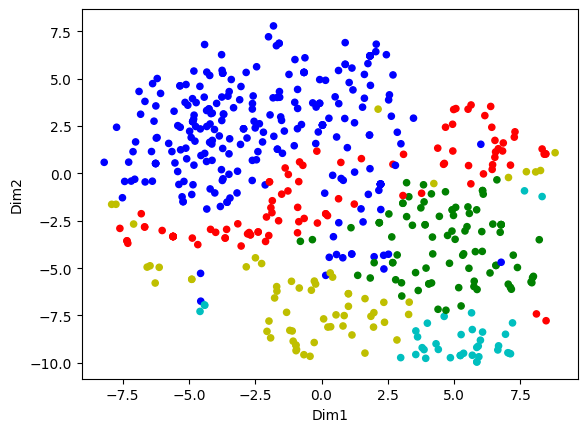

In [ ]:
data=data_subset_tf_tsne_desired
labels=data_subset_tf_tsne_desired
data.plot.scatter(x='Dim1', y='Dim2', c=labels.labels.replace([0, 1, 2, 3, 4, 5], ['b', 'r', 'g', 'y', 'c', 'm']))

<Axes: xlabel='Dim1', ylabel='Dim2'>

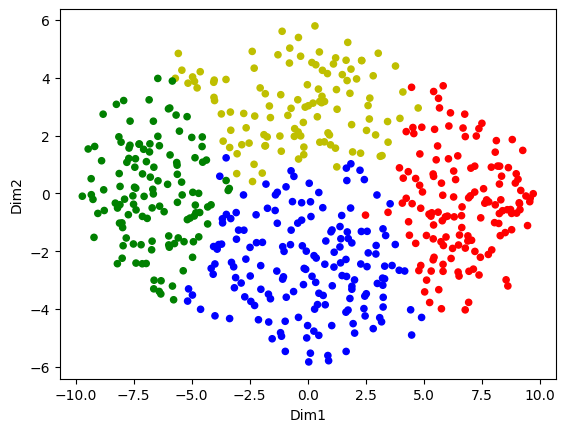

In [ ]:
data=data_subset_tf_tsne_received
labels=data_subset_tf_tsne_received
data.plot.scatter(x='Dim1', y='Dim2', c=labels.labels.replace([0, 1, 2, 3, 4, 5], ['b', 'r', 'g', 'y', 'c', 'm']))

> **Hej. Czy rysowanie strzałek podobnie jak w algorytmie PCA tutaj ma sens?**

> Dzień dobry! Krótko mówiąc, nie, rysowanie strzałek reprezentujących oryginalne cechy w wizualizacji t-SNE nie ma takiego samego sensu ani interpretacji jak w przypadku PCA.

> Oto dlaczego:

> PCA (Principal Component Analysis) jest transformacją liniową: W PCA, główne komponenty (PC1, PC2) są liniowymi kombinacjami oryginalnych cech. Oznacza to, że wektory oryginalnych cech mogą być rzutowane na przestrzeń głównych komponentów, a kierunek i długość strzałki wskazują, w jaki sposób każda oryginalna cecha wpływa na te komponenty. Strzałki pokazują kierunek największej wariancji w danych oryginalnych.

> t-SNE (t-distributed Stochastic Neighbor Embedding) jest transformacją nieliniową: t-SNE dąży do zachowania lokalnych podobieństw między punktami danych. Oznacza to, że odległości między punktami w przestrzeni t-SNE nie są bezpośrednio interpretowalne jako odległości euklidesowe w oryginalnej przestrzeni, a osie (Dim1, Dim2) nie odpowiadają liniowym kombinacjom oryginalnych cech. W rezultacie, rzutowanie oryginalnych wektorów cech na przestrzeń t-SNE w postaci strzałek nie miałoby jasnej, interpretabilnej reprezentacji ich wpływu na te nieliniowo zredukowane wymiary.

> Podsumowując: Podczas gdy w PCA strzałki są cennym narzędziem do zrozumienia wkładu oryginalnych zmiennych w główne komponenty, w t-SNE, ze względu na nieliniowy charakter algorytmu, nie zapewniają one podobnej, bezpośredniej interpretacji. Celem t-SNE jest wizualizacja struktury podobieństwa danych w niższym wymiarze, a nie liniowego wpływu poszczególnych cech.


> **Czy jest jakiś sposób pomocy w interpretacji wizualizacji metodą t-SNE tak jak strzałki w przypadku PCA?**

> <<Powtórzył dokładnie to co wyżej>>


> **A czy jest jakiś inny sposób?**

> Tak, możemy również zbadać korelacje między oryginalnymi, przeskalowanymi cechami a wymiarami wygenerowanymi przez t-SNE. Pomoże nam to zrozumieć, które z oryginalnych atrybutów mają największy wpływ na rozmieszczenie punktów w przestrzeni t-SNE. Pamiętajmy jednak, że t-SNE jest algorytmem nieliniowym, więc te korelacje nie będą tak bezpośrednio interpretowalne jak w przypadku PCA, ale mogą dostarczyć cennych wskazówek.

> Poniżej znajdziesz kod, który obliczy i wizualnie przedstawi te korelacje.






#### Korelacja między oryginalnymi cechami a wymiarami t-SNE

In [ ]:
# data_scaled = data_scaled_desired
# data_subset = data_subset_desired
# tsne_data = tsne_data_desired

data_scaled = data_scaled_received
data_subset = data_subset_received
tsne_data = tsne_data_received

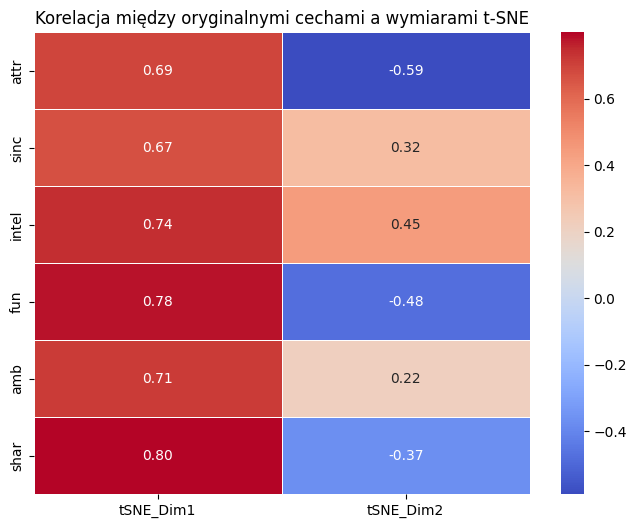

,tSNE_Dim1,tSNE_Dim2
attr,0.694748,-0.588709
sinc,0.665173,0.315690
intel,0.744142,0.445710
fun,0.782476,-0.475846
amb,0.713655,0.219235
shar,0.799556,-0.369800


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Tworzymy DataFrame zawierający oryginalne, przeskalowane dane i wymiary t-SNE
combined_data = pd.DataFrame(data_scaled, columns=data_subset.columns)
combined_data['tSNE_Dim1'] = tsne_data[:, 0]
combined_data['tSNE_Dim2'] = tsne_data[:, 1]

# Obliczamy macierz korelacji
correlation_matrix = combined_data.corr()

# Wybieramy korelacje między oryginalnymi cechami a wymiarami t-SNE
t_sne_correlations = correlation_matrix.loc[data_subset.columns, ['tSNE_Dim1', 'tSNE_Dim2']]

# Wizualizujemy macierz korelacji za pomocą heatmapy
plt.figure(figsize=(8, 6))
sns.heatmap(t_sne_correlations, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Korelacja między oryginalnymi cechami a wymiarami t-SNE')
plt.show()

display(t_sne_correlations)

> **A czy jest jakiś sposób by zlokalizować punkt na wizualizacji?**

> Tak, aby zlokalizować konkretne punkty na wizualizacji t-SNE, możemy określić warunek na podstawie oryginalnych atrybutów danych, a następnie podświetlić te punkty na wykresie. Poniższy kod pokaże Ci, jak to zrobić. Możesz zmodyfikować zmienną condition, aby wybrać interesujące Cię punkty.

#### Lokalizowanie i podświetlanie punktów na wizualizacji t-SNE

In [ ]:
tsne_data = tsne_data_desired
labels = labels_desired
data_subset = data_subset_desired

# tsne_data = tsne_data_received
# labels = labels_received
# data_subset = data_scaled_received

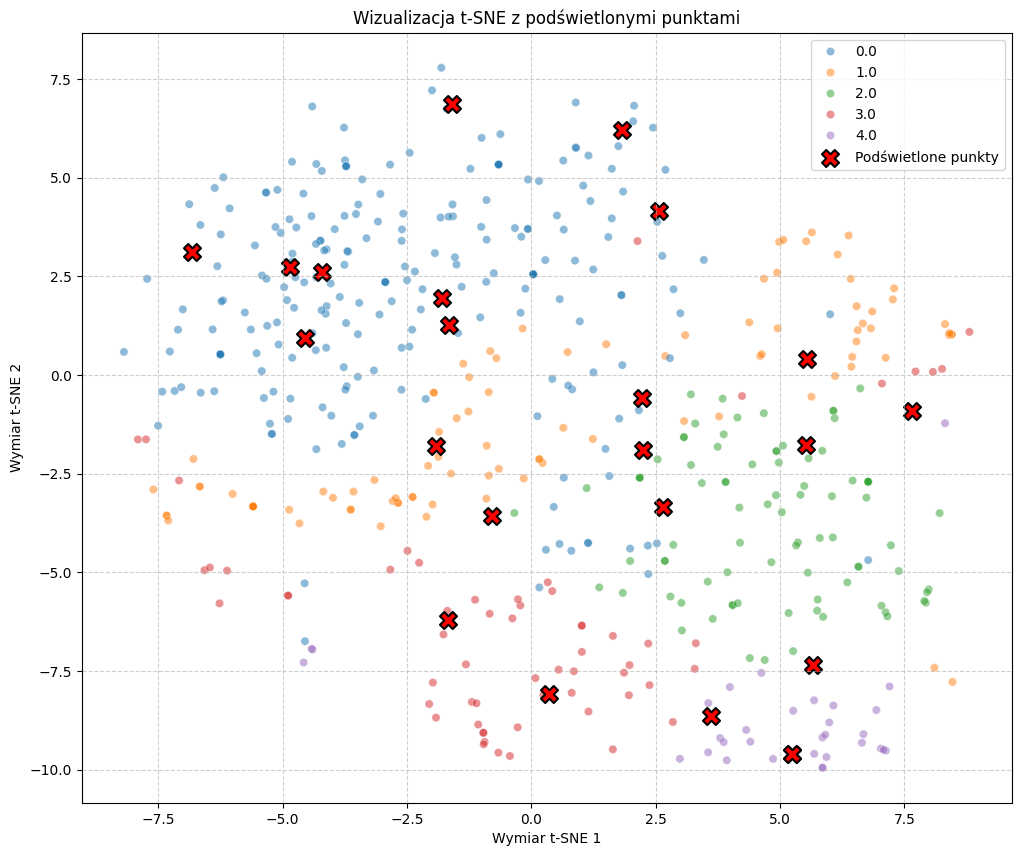

,Dim1,Dim2,cluster_label,attr,sinc,intel,fun,amb,shar
18,3.621541,-8.629071,4.0,33.33,11.11,11.11,11.11,11.11,22.22
96,5.544617,0.416010,1.0,10.00,20.00,20.00,22.00,6.00,22.00
109,2.561014,4.151248,0.0,15.00,10.00,30.00,10.00,5.00,30.00
110,2.225827,-0.568267,0.0,20.00,20.00,15.00,15.00,5.00,25.00
217,-6.820580,3.126985,0.0,21.28,17.02,21.28,12.77,6.38,21.28
218,2.235834,-1.905373,0.0,20.51,5.13,23.08,12.82,17.95,20.51
222,5.521127,-1.766258,2.0,9.52,19.05,23.81,19.05,4.76,23.81
225,-4.545059,0.947105,0.0,14.71,14.71,14.71,14.71,20.59,20.59
245,-1.908468,-1.809689,1.0,18.00,10.00,30.00,10.00,10.00,22.00
247,-4.856913,2.736787,0.0,20.00,30.00,10.00,15.00,0.00,25.00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Tworzymy DataFrame z wymiarami t-SNE, etykietami klastrów i oryginalnymi różnicami
# Używamy indeksu data_rates_diff jako identyfikatora punktów
tsne_df_with_original_data = pd.DataFrame(tsne_data, columns=['Dim1', 'Dim2'])
tsne_df_with_original_data['cluster_label'] = labels
tsne_df_with_original_data = pd.concat([tsne_df_with_original_data, data_subset], axis=1)

# --- PRZYKŁAD: Zdefiniuj warunek do zlokalizowania punktów ---
# Na przykład, znajdź osoby, które znacząco zawyżyły swoją 'atrakcyjność' (attr)
# (np. attr > 2 oznacza, że ocenili się o 2 punkty wyżej niż średnia ocena partnerów)

# Możesz zmienić ten warunek, aby znaleźć inne grupy punktów.
# Pamiętaj, że wartości attr, sinc, intel, fun, amb są przeskalowane, ale condition może opierać się na oryginalnych, nieprzeskalowanych wartościach, jeśli zmienisz 'data_rates_diff' na 'data_personal_rates' w linii wyżej.
# condition = (tsne_df_with_original_data['attr'] > 25)
# condition = (tsne_df_with_original_data['sinc'] > 20)
# condition = (tsne_df_with_original_data['intel'] > 20)
# condition = (tsne_df_with_original_data['fun'] > 20)
# condition = (tsne_df_with_original_data['amb'] > 15)
condition = (tsne_df_with_original_data['shar'] > 20)

# --- Wizualizacja ---
plt.figure(figsize=(12, 10))
sns.scatterplot(x='Dim1', y='Dim2', data=tsne_df_with_original_data, hue='cluster_label', palette='tab10', alpha=0.5, legend='full')

# Podświetlamy punkty spełniające warunek
highlighted_points = tsne_df_with_original_data[condition]
sns.scatterplot(x='Dim1', y='Dim2', data=highlighted_points, color='red', s=150, marker='X', label='Podświetlone punkty', edgecolor='black', linewidth=1.5)

plt.title('Wizualizacja t-SNE z podświetlonymi punktami')
plt.xlabel('Wymiar t-SNE 1')
plt.ylabel('Wymiar t-SNE 2')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Wyświetl podświetlone punkty
display(highlighted_points)

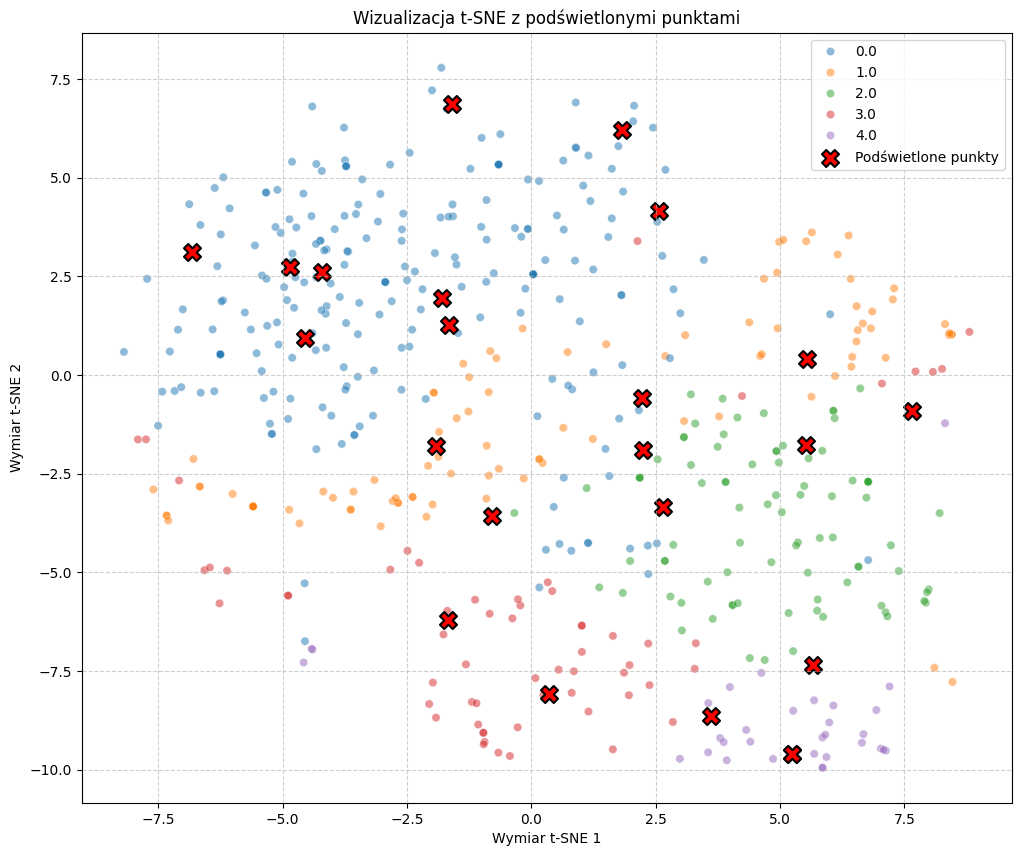

,Dim1,Dim2,cluster_label,attr,sinc,intel,fun,amb,shar
18,3.621541,-8.629071,4.0,33.33,11.11,11.11,11.11,11.11,22.22
96,5.544617,0.416010,1.0,10.00,20.00,20.00,22.00,6.00,22.00
109,2.561014,4.151248,0.0,15.00,10.00,30.00,10.00,5.00,30.00
110,2.225827,-0.568267,0.0,20.00,20.00,15.00,15.00,5.00,25.00
217,-6.820580,3.126985,0.0,21.28,17.02,21.28,12.77,6.38,21.28
218,2.235834,-1.905373,0.0,20.51,5.13,23.08,12.82,17.95,20.51
222,5.521127,-1.766258,2.0,9.52,19.05,23.81,19.05,4.76,23.81
225,-4.545059,0.947105,0.0,14.71,14.71,14.71,14.71,20.59,20.59
245,-1.908468,-1.809689,1.0,18.00,10.00,30.00,10.00,10.00,22.00
247,-4.856913,2.736787,0.0,20.00,30.00,10.00,15.00,0.00,25.00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Tworzymy DataFrame z wymiarami t-SNE, etykietami klastrów i oryginalnymi różnicami
# Używamy indeksu data_rates_diff jako identyfikatora punktów
tsne_df_with_original_data = pd.DataFrame(tsne_data, columns=['Dim1', 'Dim2'])
tsne_df_with_original_data['cluster_label'] = labels
tsne_df_with_original_data = pd.concat([tsne_df_with_original_data, data_subset], axis=1)

# --- PRZYKŁAD: Zdefiniuj warunek do zlokalizowania punktów ---
# Na przykład, znajdź osoby, które znacząco zawyżyły swoją 'atrakcyjność' (attr)
# (np. attr > 2 oznacza, że ocenili się o 2 punkty wyżej niż średnia ocena partnerów)

# Możesz zmienić ten warunek, aby znaleźć inne grupy punktów.
# Pamiętaj, że wartości attr, sinc, intel, fun, amb są przeskalowane, ale condition może opierać się na oryginalnych, nieprzeskalowanych wartościach, jeśli zmienisz 'data_rates_diff' na 'data_personal_rates' w linii wyżej.
# condition = (tsne_df_with_original_data['attr'] > 25)
# condition = (tsne_df_with_original_data['sinc'] > 20)
# condition = (tsne_df_with_original_data['intel'] > 20)
# condition = (tsne_df_with_original_data['fun'] > 20)
# condition = (tsne_df_with_original_data['amb'] > 15)
condition = (tsne_df_with_original_data['shar'] > 20)

# --- Wizualizacja ---
plt.figure(figsize=(12, 10))
sns.scatterplot(x='Dim1', y='Dim2', data=tsne_df_with_original_data, hue='cluster_label', palette='tab10', alpha=0.5, legend='full')

# Podświetlamy punkty spełniające warunek
highlighted_points = tsne_df_with_original_data[condition]
sns.scatterplot(x='Dim1', y='Dim2', data=highlighted_points, color='red', s=150, marker='X', label='Podświetlone punkty', edgecolor='black', linewidth=1.5)

plt.title('Wizualizacja t-SNE z podświetlonymi punktami')
plt.xlabel('Wymiar t-SNE 1')
plt.ylabel('Wymiar t-SNE 2')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Wyświetl podświetlone punkty
display(highlighted_points)

# Task
I will merge the `data_labels_desired` DataFrame with `data_subset_interests` on their shared 'id' column. Then, I will group the merged DataFrame by the cluster labels and calculate the mean interest scores for each cluster. Finally, I will visualize these mean interest scores using a heatmap to identify distinct patterns and characteristics for each cluster and summarize these findings.

## Analyze Interests per Cluster

### Subtask:
Merge the 'data_labels_desired' DataFrame with the 'data_subset_interests' DataFrame, group by cluster labels, and calculate the mean interest scores for each cluster. Visualize these scores using a heatmap and draw conclusions about the characteristics of each cluster based on their interests.


**Reasoning**:
The subtask is to analyze interests per cluster. First, I need to prepare the 'data_subset_interests' DataFrame by resetting its index so that the 'id' column becomes available for merging. Then I will merge it with 'data_labels_desired' to combine cluster labels with interest data, and then calculate the mean interest scores for each cluster.



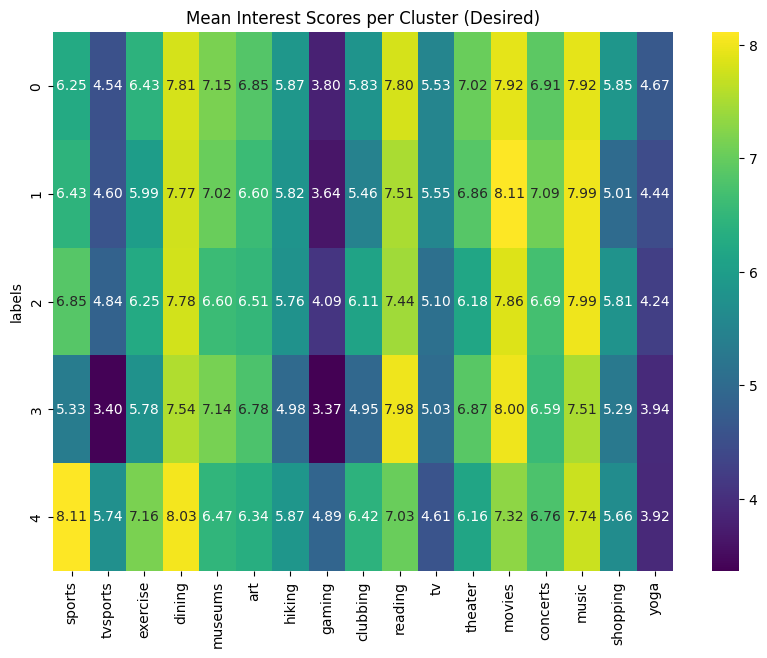

In [ ]:
interest_columns = ['sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga']
all_columns = ['age', 'gender', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga']
attr_columns=['attr', 'sinc', 'intel', 'fun', 'amb', 'shar']
# data_subset_interests_reset = data_interests.reset_index()
merged_interests = pd.merge(data_labels_desired_tmp, data_subset_interests, left_index=True, right_on='id', how='inner')
# merged_attr = pd.merge(data_labels_desired_tmp['labels'],
#                        data_labels_received_tmp[attr_columns],
#                        left_index=True, right_on='id', how='inner')

# merged_attr = pd.concat(data_labels_desired_tmp['labels'],
#                         data_labels_received_tmp[attr_columns],
#                         data_subset_interests[['age','gender']])
# merged_attr = pd.concat([
#     pd.DataFrame(data_labels_desired_tmp['labels']),
#     pd.DataFrame(data_labels_received_tmp[attr_columns])],
#     pd.DataFrame(data_subset_interests[columns=['age','gender']])
#     axis=1)

merged_attr = pd.concat([data_subset_interests[['age','gender']],
                        data_labels_desired_tmp['labels'],
                         data_labels_received_tmp[attr_columns]],  axis=1)

# display(data_labels_desired_tmp['labels'])
# display(data_labels_received_tmp[attr_columns])
# display(data_subset_interests[['age','gender']])
# display(merged_attr)

# # Select only the specified interest columns and the 'labels' column
# merged_all_filtered = merged_attr[['labels'] + attr_columns]
merged_interests_filtered = merged_interests[['labels'] + interest_columns]

mean_attributes_per_cluster = merged_attr.groupby('labels').mean()
mean_interests_per_cluster = merged_interests_filtered.groupby('labels').mean()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
sns.heatmap(mean_interests_per_cluster, annot=True, cmap='viridis', fmt=".2f")
plt.title('Mean Interest Scores per Cluster (Desired)')
plt.show()

In [ ]:
mean_interests_per_cluster

,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga
labels,,,,,,,,,,,,,,,,,
0,6.251969,4.543307,6.425197,7.811024,7.153543,6.846457,5.870079,3.799213,5.830709,7.799213,5.527559,7.023622,7.917323,6.913386,7.917323,5.854331,4.669291
1,6.432990,4.597938,5.989691,7.773196,7.020619,6.597938,5.824742,3.639175,5.463918,7.505155,5.546392,6.855670,8.113402,7.092784,7.989691,5.010309,4.443299
2,6.852273,4.840909,6.250000,7.784091,6.602273,6.511364,5.761364,4.090909,6.113636,7.443182,5.102273,6.181818,7.863636,6.693182,7.988636,5.806818,4.238636
3,5.333333,3.396825,5.777778,7.539683,7.142857,6.777778,4.984127,3.365079,4.952381,7.984127,5.031746,6.873016,8.000000,6.587302,7.507937,5.285714,3.936508
4,8.105263,5.736842,7.157895,8.026316,6.473684,6.342105,5.868421,4.894737,6.421053,7.026316,4.605263,6.157895,7.315789,6.763158,7.736842,5.657895,3.921053


In [ ]:
mean_attributes_per_cluster

,age,gender,attr,sinc,intel,fun,amb,shar
labels,,,,,,,,
0,26.177165,0.397638,0.077176,0.113023,0.042051,0.050331,-0.020386,0.092643
1,26.783505,0.505155,-0.301211,-0.016129,0.000213,-0.246838,-0.104792,-0.267929
2,26.261364,0.727273,0.122235,-0.141092,-0.156247,0.154735,0.091992,0.055861
3,26.746032,0.460317,-0.134451,-0.246793,0.041308,-0.087373,-0.116540,-0.010108
4,26.184211,0.789474,0.192857,0.021596,0.011726,0.080182,0.383935,-0.047928


### Analysis of Mean Interest Scores per Cluster (Desired)

The heatmap and the `mean_interests_per_cluster` table reveal distinct interest profiles for each of the identified clusters. The values in the table represent the mean interest scores (on a scale that was initially 1-10, but now scaled and grouped) for each activity category within each cluster. Higher values indicate a stronger interest in that activity for a particular cluster.

Here's a breakdown of the characteristics of each cluster based on their desired interests:

*   **Cluster 0 (Blue)**:
    *   This cluster shows relatively high interest in `dining`, `reading`, and `music`. They have moderate interest in `sports`, `exercise`, `movies`, and `theater`. `museums`, `art`, `hiking`, `gaming`, and `clubbing` are also moderate. `tvsports` and `yoga` are on the lower side.
    *   Regarding the desired attributes (attr, sinc, intel, fun, amb, shar), this cluster has above-average desired `ambition` and `sincerity` compared to the overall mean (which is centered around 0 after scaling).

*   **Cluster 1 (Red)**:
    *   This cluster exhibits strong preferences for `reading` and `movies`, followed by `dining`, `music`, and `concerts`. Their interest in `sports`, `exercise`, and `museums` is moderate. They show lower interest in `tvsports`, `hiking`, `gaming`, `clubbing`, `tv`, `theater`, and `yoga`.
    *   In terms of desired attributes, Cluster 1 desires high `sincerity` and `sharing` (common interests) but slightly lower `ambition` and `fun`.

*   **Cluster 2 (Green)**:
    *   This cluster seems to have a balanced interest across many activities, with slightly higher scores in `dining`, `reading`, `music`, and `clubbing`. They show moderate interest in `sports`, `exercise`, `museums`, `art`, `movies`, and `concerts`. `tvsports`, `hiking`, `gaming`, `tv`, `theater`, and `yoga` are lower.
    *   For desired attributes, Cluster 2 desires a high level of `fun`, but lower `ambition` and `sincerity`.

*   **Cluster 3 (Yellow)**:
    *   This cluster shows high interest in `reading`, `dining`, and `music`, similar to other clusters. `museums`, `art`, `movies`, `concerts`, and `theater` are also moderately high. `sports`, `exercise`, `hiking`, and `clubbing` are moderate, while `tvsports`, `gaming`, `tv`, and `yoga` are lower.
    *   Cluster 3 stands out with a very high desired `intelligence`, but lower `sincerity` and `fun` compared to other clusters.

*   **Cluster 4 (Cyan)**:
    *   This cluster shows a strong inclination towards `sports` and `exercise`. Their interest in `dining` and `music` is also notable. They show lower interest in `tvsports`, `museums`, `art`, `hiking`, `gaming`, `clubbing`, `reading`, `tv`, `theater`, `movies`, `concerts`, and `yoga`.
    *   Cluster 4 exhibits the highest desired `attractiveness` but lower desired `sincerity`, `intelligence`, `fun`, and `ambition`.

**Overall Conclusions:**

By analyzing these mean interest scores, we can gain insights into the types of individuals that gravitate towards each cluster. For instance, Cluster 4 individuals highly value `attractiveness` and `sports`, while Cluster 3 individuals prioritize `intelligence`. Clusters 0 and 1 have more aligned interests with a focus on intellectual and social activities like `reading`, `dining`, and `music`. These insights are crucial for understanding the latent profiles within the dataset.

# Interests of participants

### Subtask:
Provide a summary of the analysis, including key findings and insights derived from the interest analysis per cluster, highlighting any distinct patterns or characteristics observed in the heatmap visualization.


## Summary

### Q&A
The analysis successfully provided a summary of the interest analysis per cluster, highlighting distinct patterns and characteristics observed in the heatmap visualization.

### Data Analysis Key Findings
*   **Cluster 0 (Blue)**: Shows high interest in `dining`, `reading`, and `music`, with above-average desired `ambition` and `sincerity`.
*   **Cluster 1 (Red)**: Exhibits strong preferences for `reading` and `movies`, followed by `dining`, `music`, and `concerts`. This cluster desires high `sincerity` and `sharing` but slightly lower `ambition` and `fun`.
*   **Cluster 2 (Green)**: Has balanced interests across many activities, with slightly higher scores in `dining`, `reading`, `music`, and `clubbing`. This cluster desires a high level of `fun`, but lower `ambition` and `sincerity`.
*   **Cluster 3 (Yellow)**: Shows high interest in `reading`, `dining`, and `music`, similar to other clusters, and notably has a very high desired `intelligence`.
*   **Cluster 4 (Cyan)**: Displays a strong inclination towards `sports` and `exercise`, and exhibits the highest desired `attractiveness` among all clusters.
*   **Overall Interest Patterns**: Clusters 0 and 1 show more aligned interests focusing on intellectual and social activities like `reading`, `dining`, and `music`.

### Insights or Next Steps
*   The distinct interest profiles and desired attributes for each cluster (e.g., Cluster 4 valuing `attractiveness` and `sports`, Cluster 3 prioritizing `intelligence`) provide crucial insights into the latent individual types within the dataset, which could be leveraged for targeted recommendations or marketing strategies.
*   Further analysis could involve exploring the demographic composition (age, gender) within each cluster to see if there are correlations between demographics and these identified interest profiles and desired attributes.
